In [1]:
import pandas as pd
import numpy as np
import scipy as sp

from numpy.testing import rundocs
import matplotlib.pyplot as plt
#import talib
import random
import sklearn
from sklearn import preprocessing
import tensorflow
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import seaborn as sns
import csv
#from datetime import strptime

In [2]:
le = preprocessing.LabelEncoder()

In [3]:
#df = pd.read_excel(open('Cost.xls', 'rb'), sheet_name='Sheet1')
#df.head(76)
df = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost')
df.head(10)

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.400000,...,40000.000000,1,2,4,30,1,1.000000,1,0.471042,0.250000
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.460000,...,65833.333333,2,2,4,84,1,0.865823,2,0.286765,0.240000
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.598425,...,87500.000000,2,3,4,825,2,0.914286,4,-0.143875,0.270000
3,Alima FPU,1,2,3,2,1,5720,3,994,1.133000,...,100000.000000,3,1,2,600,3,0.900000,4,-0.022133,0.350000
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.676500,...,79400.000000,2,2,2,120,2,0.055416,3,0.114068,0.170000
5,Prelude,4,3,3,2,1,7814,3,2229,11.160000,...,148333.333333,6,5,5,250,1,0.235955,5,0.243158,0.344086
6,CLOV FPSO,1,3,3,2,1,7534,3,1383,1.800000,...,198333.333333,4,2,4,1290,4,0.806723,5,0.007954,0.055556
7,Dalia,1,4,3,2,1,4872,3,1306,3.400000,...,287000.000000,6,3,4,1360,5,0.836237,2,0.010720,0.176471
8,Girassol,1,4,3,2,1,3103,3,823,2.500000,...,246666.666667,5,3,4,1350,1,0.810811,1,0.521264,0.120000
9,Kizomba B,1,3,3,2,1,4756,3,1071,0.760000,...,316666.666667,6,1,4,1250,5,0.789474,2,-0.140056,0.133333


In [4]:
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())
print('std',df['Cost_Overrun'].std())
Std3_9 =  3.9*df['Cost_Overrun'].std()
Std3 =  3*df['Cost_Overrun'].std()
Std2 =  2*df['Cost_Overrun'].std()
print('2_std',Std2)
print('3_std',Std3)
print('3.9_std',Std3_9)
print(df.shape)

mean 0.3310880443561905
median 0.24
max 2.6800000000000006
min -0.1290322580645161
std 0.43922293864974554
2_std 0.8784458772994911
3_std 1.3176688159492367
3.9_std 1.7129694607340076
(103, 21)


In [5]:
#df[df["Cost_Overrun"]==2.6800000000000006]
df[df["Cost_Overrun"]>Std3]


,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
17,Akpo,1,4,3,2,1,5606,4,1303,2.345000,...,273333.333333,6,2,4,1325,1,0.676829,3,0.072141,1.55
28,Frade,7,3,3,2,1,6014,3,909,2.000000,...,117666.666667,3,2,4,1080,1,0.849858,5,0.209021,1.35
32,Espirito Santo,7,5,3,1,3,6153,3,787,1.508621,...,105000.000000,3,5,4,1780,1,0.952381,3,0.247776,1.32
63,Atlantis,6,2,3,2,1,4533,3,1492,2.500000,...,230000.000000,5,2,7,2145,4,0.869565,1,0.603887,1.35
67,Thunder Horse,6,2,3,2,1,4624,3,1098,5.000000,...,283333.333333,6,5,7,1830,1,0.882353,5,0.926230,2.68
77,Tahiti Spar,6,2,3,2,1,5597,3,1159,3.500000,...,136666.666667,3,3,3,1280,2,0.914634,2,0.267472,1.80


In [6]:
#df.drop([0,1])
#df.head(10)
print(df.shape)
df = df[df.Cost_Overrun < Std3]
print(df.shape)

(103, 21)
(97, 21)


In [7]:
#df.drop([df["Cost_Overrun"]==2.6800000000000006], axis =0)
#df.drop([67,67])
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

mean 0.24795946978028466
median 0.1924686192468619
max 1.1666666666666667
min -0.1290322580645161


In [8]:
df[df["Cost_Overrun"]==1.7999999999999996]
df = df[df.Cost_Overrun != 1.7999999999999996]
print(df.shape)
print('mean', df['Cost_Overrun'].mean())
print('median',df['Cost_Overrun'].median())
print('max',df['Cost_Overrun'].max())
print('min',df['Cost_Overrun'].min())

(97, 21)
mean 0.24795946978028466
median 0.1924686192468619
max 1.1666666666666667
min -0.1290322580645161


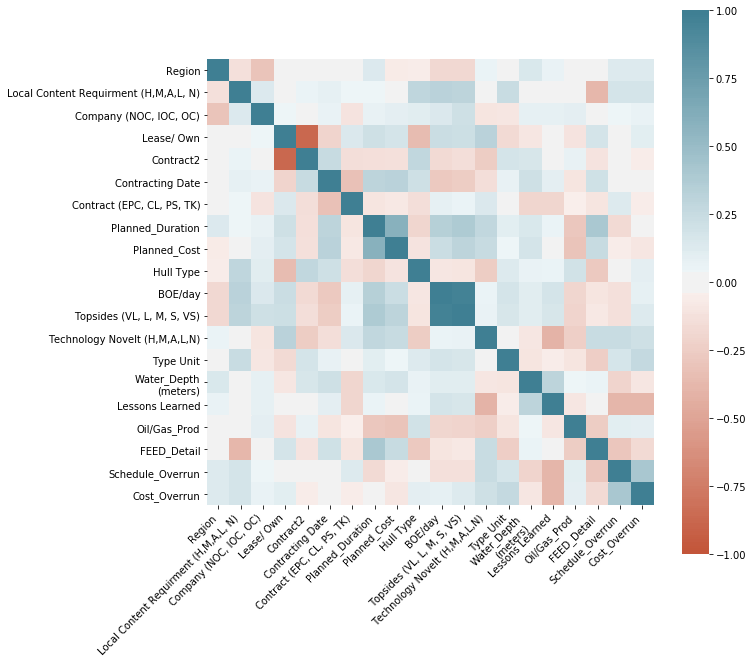

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
df.corr(method ='pearson')

,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,Hull Type,BOE/day,"Topsides (VL, L, M, S, VS)","Technology Novelt (H,M,A,L,N)",Type Unit,Water_Depth\n(meters),Lessons Learned,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun
Region,1.000000,-0.124098,-0.301201,0.035255,-0.019342,-0.000979,0.030240,0.133184,-0.064526,-0.051114,-0.185559,-0.186735,0.053274,0.010295,0.150158,0.062554,-0.014703,-0.038552,0.118853,0.127382
"Local Content Requirment (H,M,A,L, N)",-0.124098,1.000000,0.133459,-0.024294,0.051796,0.084790,0.042622,0.042920,-0.024106,0.295327,0.323711,0.297810,-0.010078,0.245675,0.025072,-0.034286,-0.012112,-0.385238,0.185526,0.185145
"Company (NOC, IOC, OC)",-0.301201,0.133459,1.000000,0.045010,-0.006683,0.069945,-0.109476,0.070898,0.090857,0.111762,0.148013,0.218063,-0.102659,-0.093536,0.079383,0.084738,0.091838,0.036020,0.045592,0.065588
Lease/ Own,0.035255,-0.024294,0.045010,1.000000,-0.872398,-0.207521,0.140770,0.213662,0.185920,-0.352999,0.236542,0.225629,0.322300,-0.168524,-0.098430,0.003034,-0.115738,0.186515,-0.017624,0.102719
Contract2,-0.019342,0.051796,-0.006683,-0.872398,1.000000,0.251273,-0.142069,-0.135321,-0.129824,0.286946,-0.159656,-0.148403,-0.251910,0.180770,0.171452,0.026059,0.072344,-0.115035,0.030339,-0.059025
Contracting Date,-0.000979,0.084790,0.069945,-0.207521,0.251273,1.000000,-0.327627,0.298205,0.326967,0.213897,-0.280454,-0.256643,-0.140801,0.076534,0.217791,0.097490,-0.107175,0.205703,0.021389,-0.033675
"Contract (EPC, CL, PS, TK)",0.030240,0.042622,-0.109476,0.140770,-0.142069,-0.327627,1.000000,-0.104303,-0.080337,-0.144792,0.085420,0.052245,0.142429,0.005079,-0.192821,-0.191401,-0.040365,-0.107738,0.132634,-0.062163
Planned_Duration,0.133184,0.042920,0.070898,0.213662,-0.135321,0.298205,-0.104303,1.000000,0.590753,-0.192154,0.341510,0.385693,0.283507,0.106942,0.152623,0.048746,-0.286247,0.405788,-0.158373,-0.015958
Planned_Cost,-0.064526,-0.024106,0.090857,0.185920,-0.129824,0.326967,-0.080337,0.590753,1.000000,-0.113907,0.230369,0.311236,0.253957,0.046596,0.182663,-0.012680,-0.302912,0.255581,-0.051778,-0.093121
Hull Type,-0.051114,0.295327,0.111762,-0.352999,0.286946,0.213897,-0.144792,-0.192154,-0.113907,1.000000,-0.099037,-0.107835,-0.255789,0.122795,0.063754,0.053548,0.193735,-0.278487,0.010269,0.096322


In [11]:
dataset = df.values

In [12]:
dataset


array([['Bohai Ming Zhu', 8, 5, ..., 1, 0.47104247104247104,
        0.24999999999999994],
       ['Petrojarl Varg', 5, 1, ..., 2, 0.2867647058823529, 0.24],
       ['Stybarrow Venture MV16', 4, 3, ..., 4, -0.14387464387464388,
        0.2699999999999999],
       ...,
       ['Big Foot', 6, 4, ..., 5, 0.9489862655330281, 0.2749999999999999],
       ['Heidrun TLP', 5, 1, ..., 5, 0.03940568475452196,
        0.076923076923077],
       ['Malikai TLP', 2, 5, ..., 5, 0.3679611650485437,
        0.07797270955165699]], dtype=object)

In [13]:
X = dataset[:,1:19]

In [14]:
X

array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658227848101266, 2],
       [4, 3, 3, ..., 2, 0.9142857142857143, 4],
       ...,
       [6, 4, 3, ..., 1, 0.9473684210526315, 5],
       [5, 1, 1, ..., 2, 0.8823529411764707, 5],
       [2, 5, 3, ..., 3, 0.878048780487805, 5]], dtype=object)

In [15]:
Y = dataset[:,20]

In [16]:
Y

array([0.24999999999999994, 0.24, 0.2699999999999999, 0.35000000000000014,
       0.16999999999999996, 0.3440860215053763, 0.05555555555555548,
       0.17647058823529416, 0.11999999999999993, 0.13333333333333341, 0.0,
       0.0, 0.85, 0.4, 0.0, 0.0, 0.3, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 0.971383147853736,
       0.00554235946159946, 0.3076923076923076, 0.19999999999999996,
       0.31099999999999994, 0.3600000000000001, 0.62, 0.52,
       0.36974789915966394, 0.6000000000000001, 0.7, 0.1924686192468619,
       0.24999999999999994, 0.0781671159029651, 0.20000000000000004,
       0.04086956521739138, 0.044000000000000004, 0.38888888888888884,
       0.98, 0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0,

In [17]:
from sklearn import preprocessing

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [19]:
X_scale

array([[1.        , 1.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.        , 0.        , ..., 0.        , 0.85795105,
        0.25      ],
       [0.42857143, 0.5       , 1.        , ..., 0.25      , 0.90925714,
        0.75      ],
       ...,
       [0.71428571, 0.75      , 1.        , ..., 0.        , 0.9442807 ,
        1.        ],
       [0.57142857, 0.        , 0.        , ..., 0.25      , 0.87545098,
        1.        ],
       [0.14285714, 1.        , 1.        , ..., 0.5       , 0.87089431,
        1.        ]])

In [20]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [21]:
#Y_scale

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [25]:
print(X.shape)
print(Y.shape)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

(97, 18)
(97,)


In [26]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 18) (15, 18) (15, 18) (67,) (15,) (15,)


In [27]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [28]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [30]:
for train, test in kfold.split(X_scale, Y):
# create model
	model2 = Sequential()
	model2.add(Dense(28, input_dim=18, activation='relu'))
	model2.add(Dense(8, activation='relu'))
	model2.add(Dense(1, activation='sigmoid'))
	# Compile model
	model2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model2.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model2.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [31]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model3 = Sequential([
        Dense(28, activation='sigmoid', input_shape=(18,)),
        Dense(3, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model3.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model3.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model3.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))    


Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 6ms/step - loss: 0.1807 - accuracy: 0.0000e+00 - val_loss: 0.2013 - val_accuracy: 0.0000e+00
Epoch 2/400
67/67 [==============================] - 0s 251us/step - loss: 0.1767 - accuracy: 0.0000e+00 - val_loss: 0.1966 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 290us/step - loss: 0.1729 - accuracy: 0.0000e+00 - val_loss: 0.1922 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 231us/step - loss: 0.1693 - accuracy: 0.0000e+00 - val_loss: 0.1879 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 238us/step - loss: 0.1659 - accuracy: 0.0000e+00 - val_loss: 0.1837 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 240us/step - loss: 0.1625 - accuracy: 0.0000e+00 - val_loss: 0.1797 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] -

Epoch 57/400
67/67 [==============================] - 0s 241us/step - loss: 0.0912 - accuracy: 0.1642 - val_loss: 0.0881 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 243us/step - loss: 0.0907 - accuracy: 0.1642 - val_loss: 0.0874 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 222us/step - loss: 0.0902 - accuracy: 0.1642 - val_loss: 0.0867 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 227us/step - loss: 0.0898 - accuracy: 0.1642 - val_loss: 0.0861 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 243us/step - loss: 0.0894 - accuracy: 0.1642 - val_loss: 0.0854 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 232us/step - loss: 0.0890 - accuracy: 0.1642 - val_loss: 0.0847 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 234us/step - loss: 0.0885 - accuracy: 0.1642 - val_loss: 0.0841 - val_accuracy:

Epoch 114/400
67/67 [==============================] - 0s 236us/step - loss: 0.0778 - accuracy: 0.1642 - val_loss: 0.0657 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 224us/step - loss: 0.0776 - accuracy: 0.1642 - val_loss: 0.0655 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 236us/step - loss: 0.0775 - accuracy: 0.1642 - val_loss: 0.0653 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 274us/step - loss: 0.0775 - accuracy: 0.1642 - val_loss: 0.0651 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 243us/step - loss: 0.0774 - accuracy: 0.1642 - val_loss: 0.0649 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 244us/step - loss: 0.0773 - accuracy: 0.1642 - val_loss: 0.0647 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 233us/step - loss: 0.0772 - accuracy: 0.1642 - val_loss: 0.0646 - val_ac

67/67 [==============================] - 0s 247us/step - loss: 0.0749 - accuracy: 0.1642 - val_loss: 0.0590 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 257us/step - loss: 0.0749 - accuracy: 0.1642 - val_loss: 0.0589 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 252us/step - loss: 0.0749 - accuracy: 0.1642 - val_loss: 0.0589 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 241us/step - loss: 0.0749 - accuracy: 0.1642 - val_loss: 0.0588 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 259us/step - loss: 0.0749 - accuracy: 0.1642 - val_loss: 0.0587 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 240us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0586 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 264us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0586 - val_accuracy: 0.2667

67/67 [==============================] - 0s 267us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0563 - val_accuracy: 0.2667
Epoch 227/400
67/67 [==============================] - 0s 265us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0563 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 274us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0563 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 272us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 270us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 274us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 251us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0561 - val_accuracy: 0.2667

67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0551 - val_accuracy: 0.2667
Epoch 283/400
67/67 [==============================] - 0s 235us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0551 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 237us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0550 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 248us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0550 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 224us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0550 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 239us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0550 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 247us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0549 - val_accuracy: 0.2667

67/67 [==============================] - 0s 260us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 339/400
67/67 [==============================] - 0s 237us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 260us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 240us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 251us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 236us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 255us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667

67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 395/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 229us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 244us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 236us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 287us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 265us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667

Epoch 51/400
67/67 [==============================] - 0s 263us/step - loss: 0.0794 - accuracy: 0.1642 - val_loss: 0.0681 - val_accuracy: 0.2667
Epoch 52/400
67/67 [==============================] - 0s 259us/step - loss: 0.0792 - accuracy: 0.1642 - val_loss: 0.0677 - val_accuracy: 0.2667
Epoch 53/400
67/67 [==============================] - 0s 243us/step - loss: 0.0790 - accuracy: 0.1642 - val_loss: 0.0673 - val_accuracy: 0.2667
Epoch 54/400
67/67 [==============================] - 0s 243us/step - loss: 0.0788 - accuracy: 0.1642 - val_loss: 0.0669 - val_accuracy: 0.2667
Epoch 55/400
67/67 [==============================] - 0s 246us/step - loss: 0.0786 - accuracy: 0.1642 - val_loss: 0.0665 - val_accuracy: 0.2667
Epoch 56/400
67/67 [==============================] - 0s 242us/step - loss: 0.0784 - accuracy: 0.1642 - val_loss: 0.0663 - val_accuracy: 0.2667
Epoch 57/400
67/67 [==============================] - 0s 235us/step - loss: 0.0783 - accuracy: 0.1642 - val_loss: 0.0660 - val_accuracy:

Epoch 108/400
67/67 [==============================] - 0s 234us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 109/400
67/67 [==============================] - 0s 227us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 110/400
67/67 [==============================] - 0s 241us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 111/400
67/67 [==============================] - 0s 235us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 112/400
67/67 [==============================] - 0s 306us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0569 - val_accuracy: 0.2667
Epoch 113/400
67/67 [==============================] - 0s 241us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0568 - val_accuracy: 0.2667
Epoch 114/400
67/67 [==============================] - 0s 234us/step - loss: 0.0745 - accuracy: 0.1642 - val_loss: 0.0567 - val_ac

67/67 [==============================] - 0s 258us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 165/400
67/67 [==============================] - 0s 301us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 166/400
67/67 [==============================] - 0s 251us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 167/400
67/67 [==============================] - 0s 237us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 273us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 262us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 170/400
67/67 [==============================] - 0s 262us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667

67/67 [==============================] - 0s 235us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 221/400
67/67 [==============================] - 0s 233us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 222/400
67/67 [==============================] - 0s 218us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 223/400
67/67 [==============================] - 0s 231us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 224/400
67/67 [==============================] - 0s 225us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 225/400
67/67 [==============================] - 0s 217us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 226/400
67/67 [==============================] - 0s 209us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667

67/67 [==============================] - 0s 242us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 277/400
67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 278/400
67/67 [==============================] - 0s 242us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 279/400
67/67 [==============================] - 0s 237us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 280/400
67/67 [==============================] - 0s 221us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 281/400
67/67 [==============================] - 0s 224us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 282/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 333/400
67/67 [==============================] - 0s 236us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 334/400
67/67 [==============================] - 0s 224us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 335/400
67/67 [==============================] - 0s 222us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 336/400
67/67 [==============================] - 0s 226us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 337/400
67/67 [==============================] - 0s 300us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 338/400
67/67 [==============================] - 0s 265us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 259us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 389/400
67/67 [==============================] - 0s 227us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 390/400
67/67 [==============================] - 0s 257us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 391/400
67/67 [==============================] - 0s 249us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 392/400
67/67 [==============================] - 0s 249us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 393/400
67/67 [==============================] - 0s 266us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 394/400
67/67 [==============================] - 0s 260us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667

Epoch 45/400
67/67 [==============================] - 0s 269us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 46/400
67/67 [==============================] - 0s 293us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 47/400
67/67 [==============================] - 0s 262us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 48/400
67/67 [==============================] - 0s 300us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 49/400
67/67 [==============================] - 0s 288us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 50/400
67/67 [==============================] - 0s 276us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 51/400
67/67 [==============================] - 0s 288us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy:

Epoch 102/400
67/67 [==============================] - 0s 243us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 103/400
67/67 [==============================] - 0s 235us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 104/400
67/67 [==============================] - 0s 245us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 105/400
67/67 [==============================] - 0s 219us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 106/400
67/67 [==============================] - 0s 234us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 107/400
67/67 [==============================] - 0s 262us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 108/400
67/67 [==============================] - 0s 228us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0530 - val_ac

67/67 [==============================] - 0s 225us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 159/400
67/67 [==============================] - 0s 230us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 160/400
67/67 [==============================] - 0s 228us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 161/400
67/67 [==============================] - 0s 220us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 162/400
67/67 [==============================] - 0s 227us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 163/400
67/67 [==============================] - 0s 226us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 164/400
67/67 [==============================] - 0s 217us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 246us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 215/400
67/67 [==============================] - 0s 242us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 216/400
67/67 [==============================] - 0s 253us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 217/400
67/67 [==============================] - 0s 255us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 218/400
67/67 [==============================] - 0s 256us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 219/400
67/67 [==============================] - 0s 241us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 220/400
67/67 [==============================] - 0s 235us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667

67/67 [==============================] - 0s 221us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 271/400
67/67 [==============================] - 0s 227us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 272/400
67/67 [==============================] - 0s 224us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 273/400
67/67 [==============================] - 0s 213us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 274/400
67/67 [==============================] - 0s 230us/step - loss: 0.0738 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 275/400
67/67 [==============================] - 0s 232us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 276/400
67/67 [==============================] - 0s 229us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667

67/67 [==============================] - 0s 226us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 327/400
67/67 [==============================] - 0s 222us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 328/400
67/67 [==============================] - 0s 228us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 329/400
67/67 [==============================] - 0s 211us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 330/400
67/67 [==============================] - 0s 232us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 331/400
67/67 [==============================] - 0s 212us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 332/400
67/67 [==============================] - 0s 219us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667

67/67 [==============================] - 0s 268us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 383/400
67/67 [==============================] - 0s 268us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 384/400
67/67 [==============================] - 0s 282us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 385/400
67/67 [==============================] - 0s 246us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 386/400
67/67 [==============================] - 0s 275us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 387/400
67/67 [==============================] - 0s 268us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 388/400
67/67 [==============================] - 0s 272us/step - loss: 0.0737 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667

67/67 [==============================] - 0s 285us/step - loss: 0.1020 - accuracy: 0.1642 - val_loss: 0.1020 - val_accuracy: 0.2667
Epoch 38/400
67/67 [==============================] - 0s 304us/step - loss: 0.1006 - accuracy: 0.1642 - val_loss: 0.0999 - val_accuracy: 0.2667
Epoch 39/400
67/67 [==============================] - 0s 236us/step - loss: 0.0992 - accuracy: 0.1642 - val_loss: 0.0979 - val_accuracy: 0.2667
Epoch 40/400
67/67 [==============================] - 0s 230us/step - loss: 0.0978 - accuracy: 0.1642 - val_loss: 0.0961 - val_accuracy: 0.2667
Epoch 41/400
67/67 [==============================] - 0s 235us/step - loss: 0.0966 - accuracy: 0.1642 - val_loss: 0.0944 - val_accuracy: 0.2667
Epoch 42/400
67/67 [==============================] - 0s 223us/step - loss: 0.0954 - accuracy: 0.1642 - val_loss: 0.0927 - val_accuracy: 0.2667
Epoch 43/400
67/67 [==============================] - 0s 222us/step - loss: 0.0944 - accuracy: 0.1642 - val_loss: 0.0911 - val_accuracy: 0.2667
Epoch

Epoch 94/400
67/67 [==============================] - 0s 349us/step - loss: 0.0764 - accuracy: 0.1642 - val_loss: 0.0616 - val_accuracy: 0.2667
Epoch 95/400
67/67 [==============================] - 0s 277us/step - loss: 0.0763 - accuracy: 0.1642 - val_loss: 0.0615 - val_accuracy: 0.2667
Epoch 96/400
67/67 [==============================] - 0s 281us/step - loss: 0.0763 - accuracy: 0.1642 - val_loss: 0.0613 - val_accuracy: 0.2667
Epoch 97/400
67/67 [==============================] - 0s 242us/step - loss: 0.0762 - accuracy: 0.1642 - val_loss: 0.0611 - val_accuracy: 0.2667
Epoch 98/400
67/67 [==============================] - 0s 233us/step - loss: 0.0761 - accuracy: 0.1642 - val_loss: 0.0609 - val_accuracy: 0.2667
Epoch 99/400
67/67 [==============================] - 0s 255us/step - loss: 0.0760 - accuracy: 0.1642 - val_loss: 0.0607 - val_accuracy: 0.2667
Epoch 100/400
67/67 [==============================] - 0s 220us/step - loss: 0.0759 - accuracy: 0.1642 - val_loss: 0.0605 - val_accuracy

67/67 [==============================] - 0s 238us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 151/400
67/67 [==============================] - 0s 234us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 152/400
67/67 [==============================] - 0s 232us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 153/400
67/67 [==============================] - 0s 243us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 154/400
67/67 [==============================] - 0s 232us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 155/400
67/67 [==============================] - 0s 224us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 156/400
67/67 [==============================] - 0s 226us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667

67/67 [==============================] - 0s 233us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 207/400
67/67 [==============================] - 0s 232us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0541 - val_accuracy: 0.2667
Epoch 208/400
67/67 [==============================] - 0s 216us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0541 - val_accuracy: 0.2667
Epoch 209/400
67/67 [==============================] - 0s 235us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0541 - val_accuracy: 0.2667
Epoch 210/400
67/67 [==============================] - 0s 221us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0541 - val_accuracy: 0.2667
Epoch 211/400
67/67 [==============================] - 0s 223us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0541 - val_accuracy: 0.2667
Epoch 212/400
67/67 [==============================] - 0s 231us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667

67/67 [==============================] - 0s 227us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 263/400
67/67 [==============================] - 0s 224us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 264/400
67/67 [==============================] - 0s 217us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 265/400
67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 266/400
67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 267/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 268/400
67/67 [==============================] - 0s 215us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 236us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 319/400
67/67 [==============================] - 0s 268us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 320/400
67/67 [==============================] - 0s 261us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 321/400
67/67 [==============================] - 0s 241us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 322/400
67/67 [==============================] - 0s 272us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 323/400
67/67 [==============================] - 0s 253us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 324/400
67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 375/400
67/67 [==============================] - 0s 234us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 376/400
67/67 [==============================] - 0s 226us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 377/400
67/67 [==============================] - 0s 231us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 378/400
67/67 [==============================] - 0s 237us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 379/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 380/400
67/67 [==============================] - 0s 238us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667

Epoch 30/400
67/67 [==============================] - 0s 226us/step - loss: 0.0960 - accuracy: 0.1642 - val_loss: 0.0931 - val_accuracy: 0.2667
Epoch 31/400
67/67 [==============================] - 0s 225us/step - loss: 0.0948 - accuracy: 0.1642 - val_loss: 0.0916 - val_accuracy: 0.2667
Epoch 32/400
67/67 [==============================] - 0s 235us/step - loss: 0.0937 - accuracy: 0.1642 - val_loss: 0.0899 - val_accuracy: 0.2667
Epoch 33/400
67/67 [==============================] - 0s 225us/step - loss: 0.0926 - accuracy: 0.1642 - val_loss: 0.0884 - val_accuracy: 0.2667
Epoch 34/400
67/67 [==============================] - 0s 224us/step - loss: 0.0916 - accuracy: 0.1642 - val_loss: 0.0869 - val_accuracy: 0.2667
Epoch 35/400
67/67 [==============================] - 0s 233us/step - loss: 0.0905 - accuracy: 0.1642 - val_loss: 0.0855 - val_accuracy: 0.2667
Epoch 36/400
67/67 [==============================] - 0s 227us/step - loss: 0.0896 - accuracy: 0.1642 - val_loss: 0.0842 - val_accuracy:

Epoch 87/400
67/67 [==============================] - 0s 218us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0596 - val_accuracy: 0.2667
Epoch 88/400
67/67 [==============================] - 0s 235us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0595 - val_accuracy: 0.2667
Epoch 89/400
67/67 [==============================] - 0s 236us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0593 - val_accuracy: 0.2667
Epoch 90/400
67/67 [==============================] - 0s 221us/step - loss: 0.0746 - accuracy: 0.1642 - val_loss: 0.0591 - val_accuracy: 0.2667
Epoch 91/400
67/67 [==============================] - 0s 233us/step - loss: 0.0745 - accuracy: 0.1642 - val_loss: 0.0590 - val_accuracy: 0.2667
Epoch 92/400
67/67 [==============================] - 0s 218us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0588 - val_accuracy: 0.2667
Epoch 93/400
67/67 [==============================] - 0s 226us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0587 - val_accuracy:

67/67 [==============================] - 0s 236us/step - loss: 0.0731 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 144/400
67/67 [==============================] - 0s 228us/step - loss: 0.0731 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 145/400
67/67 [==============================] - 0s 223us/step - loss: 0.0731 - accuracy: 0.1642 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 146/400
67/67 [==============================] - 0s 242us/step - loss: 0.0730 - accuracy: 0.1642 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 147/400
67/67 [==============================] - 0s 219us/step - loss: 0.0730 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 148/400
67/67 [==============================] - 0s 217us/step - loss: 0.0730 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 149/400
67/67 [==============================] - 0s 235us/step - loss: 0.0730 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667

67/67 [==============================] - 0s 243us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 200/400
67/67 [==============================] - 0s 263us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 201/400
67/67 [==============================] - 0s 263us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 202/400
67/67 [==============================] - 0s 294us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 203/400
67/67 [==============================] - 0s 264us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 204/400
67/67 [==============================] - 0s 298us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 205/400
67/67 [==============================] - 0s 269us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0531 - val_accuracy: 0.2667

67/67 [==============================] - 0s 224us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 256/400
67/67 [==============================] - 0s 225us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 257/400
67/67 [==============================] - 0s 219us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 258/400
67/67 [==============================] - 0s 218us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 259/400
67/67 [==============================] - 0s 233us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 260/400
67/67 [==============================] - 0s 233us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 261/400
67/67 [==============================] - 0s 231us/step - loss: 0.0728 - accuracy: 0.1642 - val_loss: 0.0527 - val_accuracy: 0.2667

67/67 [==============================] - 0s 218us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 312/400
67/67 [==============================] - 0s 227us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 313/400
67/67 [==============================] - 0s 228us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 314/400
67/67 [==============================] - 0s 233us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 315/400
67/67 [==============================] - 0s 223us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 316/400
67/67 [==============================] - 0s 287us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 317/400
67/67 [==============================] - 0s 265us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667

67/67 [==============================] - 0s 229us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0523 - val_accuracy: 0.2667
Epoch 368/400
67/67 [==============================] - 0s 228us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 369/400
67/67 [==============================] - 0s 232us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 370/400
67/67 [==============================] - 0s 229us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 371/400
67/67 [==============================] - 0s 225us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 372/400
67/67 [==============================] - 0s 240us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 373/400
67/67 [==============================] - 0s 237us/step - loss: 0.0727 - accuracy: 0.1642 - val_loss: 0.0524 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.1546 - accuracy: 0.0000e+00 - val_loss: 0.1684 - val_accuracy: 0.0000e+00
Epoch 23/400
67/67 [==============================] - 0s 228us/step - loss: 0.1510 - accuracy: 0.0000e+00 - val_loss: 0.1642 - val_accuracy: 0.0000e+00
Epoch 24/400
67/67 [==============================] - 0s 242us/step - loss: 0.1477 - accuracy: 0.0000e+00 - val_loss: 0.1601 - val_accuracy: 0.0000e+00
Epoch 25/400
67/67 [==============================] - 0s 232us/step - loss: 0.1445 - accuracy: 0.0000e+00 - val_loss: 0.1564 - val_accuracy: 0.0000e+00
Epoch 26/400
67/67 [==============================] - 0s 225us/step - loss: 0.1416 - accuracy: 0.0000e+00 - val_loss: 0.1530 - val_accuracy: 0.0000e+00
Epoch 27/400
67/67 [==============================] - 0s 218us/step - loss: 0.1389 - accuracy: 0.0000e+00 - val_loss: 0.1496 - val_accuracy: 0.0000e+00
Epoch 28/400
67/67 [==============================] - 0s 237us/step - loss: 0.1362 - accuracy: 0.0149

67/67 [==============================] - 0s 242us/step - loss: 0.0865 - accuracy: 0.1642 - val_loss: 0.0801 - val_accuracy: 0.2667
Epoch 79/400
67/67 [==============================] - 0s 270us/step - loss: 0.0861 - accuracy: 0.1642 - val_loss: 0.0796 - val_accuracy: 0.2667
Epoch 80/400
67/67 [==============================] - 0s 271us/step - loss: 0.0858 - accuracy: 0.1642 - val_loss: 0.0790 - val_accuracy: 0.2667
Epoch 81/400
67/67 [==============================] - 0s 287us/step - loss: 0.0854 - accuracy: 0.1642 - val_loss: 0.0786 - val_accuracy: 0.2667
Epoch 82/400
67/67 [==============================] - 0s 336us/step - loss: 0.0851 - accuracy: 0.1642 - val_loss: 0.0781 - val_accuracy: 0.2667
Epoch 83/400
67/67 [==============================] - 0s 290us/step - loss: 0.0848 - accuracy: 0.1642 - val_loss: 0.0776 - val_accuracy: 0.2667
Epoch 84/400
67/67 [==============================] - 0s 254us/step - loss: 0.0846 - accuracy: 0.1642 - val_loss: 0.0772 - val_accuracy: 0.2667
Epoch

Epoch 135/400
67/67 [==============================] - 0s 252us/step - loss: 0.0770 - accuracy: 0.1642 - val_loss: 0.0637 - val_accuracy: 0.2667
Epoch 136/400
67/67 [==============================] - 0s 310us/step - loss: 0.0769 - accuracy: 0.1642 - val_loss: 0.0636 - val_accuracy: 0.2667
Epoch 137/400
67/67 [==============================] - 0s 279us/step - loss: 0.0769 - accuracy: 0.1642 - val_loss: 0.0634 - val_accuracy: 0.2667
Epoch 138/400
67/67 [==============================] - 0s 250us/step - loss: 0.0768 - accuracy: 0.1642 - val_loss: 0.0632 - val_accuracy: 0.2667
Epoch 139/400
67/67 [==============================] - 0s 239us/step - loss: 0.0767 - accuracy: 0.1642 - val_loss: 0.0631 - val_accuracy: 0.2667
Epoch 140/400
67/67 [==============================] - 0s 256us/step - loss: 0.0767 - accuracy: 0.1642 - val_loss: 0.0630 - val_accuracy: 0.2667
Epoch 141/400
67/67 [==============================] - 0s 227us/step - loss: 0.0766 - accuracy: 0.1642 - val_loss: 0.0629 - val_ac

67/67 [==============================] - 0s 228us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0583 - val_accuracy: 0.2667
Epoch 192/400
67/67 [==============================] - 0s 224us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0582 - val_accuracy: 0.2667
Epoch 193/400
67/67 [==============================] - 0s 231us/step - loss: 0.0748 - accuracy: 0.1642 - val_loss: 0.0581 - val_accuracy: 0.2667
Epoch 194/400
67/67 [==============================] - 0s 233us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0581 - val_accuracy: 0.2667
Epoch 195/400
67/67 [==============================] - 0s 239us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0580 - val_accuracy: 0.2667
Epoch 196/400
67/67 [==============================] - 0s 235us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0580 - val_accuracy: 0.2667
Epoch 197/400
67/67 [==============================] - 0s 218us/step - loss: 0.0747 - accuracy: 0.1642 - val_loss: 0.0580 - val_accuracy: 0.2667

67/67 [==============================] - 0s 257us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0560 - val_accuracy: 0.2667
Epoch 248/400
67/67 [==============================] - 0s 223us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0560 - val_accuracy: 0.2667
Epoch 249/400
67/67 [==============================] - 0s 243us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0560 - val_accuracy: 0.2667
Epoch 250/400
67/67 [==============================] - 0s 225us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 251/400
67/67 [==============================] - 0s 220us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 252/400
67/67 [==============================] - 0s 228us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 253/400
67/67 [==============================] - 0s 234us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0559 - val_accuracy: 0.2667

67/67 [==============================] - 0s 227us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0548 - val_accuracy: 0.2667
Epoch 304/400
67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0548 - val_accuracy: 0.2667
Epoch 305/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0548 - val_accuracy: 0.2667
Epoch 306/400
67/67 [==============================] - 0s 220us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 307/400
67/67 [==============================] - 0s 224us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 308/400
67/67 [==============================] - 0s 228us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0548 - val_accuracy: 0.2667
Epoch 309/400
67/67 [==============================] - 0s 221us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667

67/67 [==============================] - 0s 230us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 360/400
67/67 [==============================] - 0s 221us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 361/400
67/67 [==============================] - 0s 237us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 362/400
67/67 [==============================] - 0s 228us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 363/400
67/67 [==============================] - 0s 225us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 364/400
67/67 [==============================] - 0s 236us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 365/400
67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667

67/67 [==============================] - 0s 255us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 16/400
67/67 [==============================] - 0s 257us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 17/400
67/67 [==============================] - 0s 253us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 18/400
67/67 [==============================] - 0s 262us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 19/400
67/67 [==============================] - 0s 276us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 20/400
67/67 [==============================] - 0s 234us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 21/400
67/67 [==============================] - 0s 246us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch

Epoch 72/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 73/400
67/67 [==============================] - 0s 239us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 74/400
67/67 [==============================] - 0s 244us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 75/400
67/67 [==============================] - 0s 244us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 76/400
67/67 [==============================] - 0s 247us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 77/400
67/67 [==============================] - 0s 223us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 78/400
67/67 [==============================] - 0s 227us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy:

Epoch 129/400
67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 130/400
67/67 [==============================] - 0s 270us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 131/400
67/67 [==============================] - 0s 233us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 132/400
67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 133/400
67/67 [==============================] - 0s 242us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 134/400
67/67 [==============================] - 0s 240us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 135/400
67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_ac

67/67 [==============================] - 0s 258us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 186/400
67/67 [==============================] - 0s 238us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 187/400
67/67 [==============================] - 0s 234us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 188/400
67/67 [==============================] - 0s 240us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 189/400
67/67 [==============================] - 0s 238us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 190/400
67/67 [==============================] - 0s 249us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0533 - val_accuracy: 0.2667
Epoch 191/400
67/67 [==============================] - 0s 223us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 235us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 242/400
67/67 [==============================] - 0s 226us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 243/400
67/67 [==============================] - 0s 227us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 244/400
67/67 [==============================] - 0s 243us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 245/400
67/67 [==============================] - 0s 244us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 246/400
67/67 [==============================] - 0s 254us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 247/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 238us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 298/400
67/67 [==============================] - 0s 275us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 299/400
67/67 [==============================] - 0s 271us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 300/400
67/67 [==============================] - 0s 276us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 301/400
67/67 [==============================] - 0s 288us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 302/400
67/67 [==============================] - 0s 267us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 303/400
67/67 [==============================] - 0s 270us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667

67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 354/400
67/67 [==============================] - 0s 251us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 355/400
67/67 [==============================] - 0s 256us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 356/400
67/67 [==============================] - 0s 257us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 357/400
67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 358/400
67/67 [==============================] - 0s 243us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 359/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667

67/67 [==============================] - 0s 235us/step - loss: 0.0917 - accuracy: 0.1642 - val_loss: 0.0880 - val_accuracy: 0.2667
Epoch 10/400
67/67 [==============================] - 0s 223us/step - loss: 0.0908 - accuracy: 0.1642 - val_loss: 0.0866 - val_accuracy: 0.2667
Epoch 11/400
67/67 [==============================] - 0s 216us/step - loss: 0.0899 - accuracy: 0.1642 - val_loss: 0.0854 - val_accuracy: 0.2667
Epoch 12/400
67/67 [==============================] - 0s 228us/step - loss: 0.0892 - accuracy: 0.1642 - val_loss: 0.0842 - val_accuracy: 0.2667
Epoch 13/400
67/67 [==============================] - 0s 215us/step - loss: 0.0884 - accuracy: 0.1642 - val_loss: 0.0832 - val_accuracy: 0.2667
Epoch 14/400
67/67 [==============================] - 0s 235us/step - loss: 0.0877 - accuracy: 0.1642 - val_loss: 0.0822 - val_accuracy: 0.2667
Epoch 15/400
67/67 [==============================] - 0s 238us/step - loss: 0.0871 - accuracy: 0.1642 - val_loss: 0.0811 - val_accuracy: 0.2667
Epoch

Epoch 66/400
67/67 [==============================] - 0s 236us/step - loss: 0.0757 - accuracy: 0.1642 - val_loss: 0.0605 - val_accuracy: 0.2667
Epoch 67/400
67/67 [==============================] - 0s 234us/step - loss: 0.0756 - accuracy: 0.1642 - val_loss: 0.0604 - val_accuracy: 0.2667
Epoch 68/400
67/67 [==============================] - 0s 241us/step - loss: 0.0755 - accuracy: 0.1642 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 69/400
67/67 [==============================] - 0s 224us/step - loss: 0.0754 - accuracy: 0.1642 - val_loss: 0.0600 - val_accuracy: 0.2667
Epoch 70/400
67/67 [==============================] - 0s 223us/step - loss: 0.0754 - accuracy: 0.1642 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 71/400
67/67 [==============================] - 0s 227us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 72/400
67/67 [==============================] - 0s 225us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0595 - val_accuracy:

Epoch 123/400
67/67 [==============================] - 0s 223us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 124/400
67/67 [==============================] - 0s 236us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 125/400
67/67 [==============================] - 0s 229us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 126/400
67/67 [==============================] - 0s 239us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 127/400
67/67 [==============================] - 0s 249us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 128/400
67/67 [==============================] - 0s 293us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 129/400
67/67 [==============================] - 0s 284us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0556 - val_ac

67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 180/400
67/67 [==============================] - 0s 222us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 181/400
67/67 [==============================] - 0s 237us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 182/400
67/67 [==============================] - 0s 222us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 183/400
67/67 [==============================] - 0s 226us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 184/400
67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667
Epoch 185/400
67/67 [==============================] - 0s 217us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0542 - val_accuracy: 0.2667

67/67 [==============================] - 0s 277us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 236/400
67/67 [==============================] - 0s 270us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 237/400
67/67 [==============================] - 0s 344us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 238/400
67/67 [==============================] - 0s 244us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 239/400
67/67 [==============================] - 0s 283us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 240/400
67/67 [==============================] - 0s 267us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 241/400
67/67 [==============================] - 0s 275us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667

67/67 [==============================] - 0s 229us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 292/400
67/67 [==============================] - 0s 229us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 293/400
67/67 [==============================] - 0s 241us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 294/400
67/67 [==============================] - 0s 230us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 295/400
67/67 [==============================] - 0s 223us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 296/400
67/67 [==============================] - 0s 242us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 297/400
67/67 [==============================] - 0s 226us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667

67/67 [==============================] - 0s 234us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 348/400
67/67 [==============================] - 0s 269us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 349/400
67/67 [==============================] - 0s 233us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 350/400
67/67 [==============================] - 0s 224us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 351/400
67/67 [==============================] - 0s 236us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 352/400
67/67 [==============================] - 0s 229us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 353/400
67/67 [==============================] - 0s 233us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667

67/67 [==============================] - 0s 244us/step - loss: 0.1379 - accuracy: 0.0000e+00 - val_loss: 0.1501 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 231us/step - loss: 0.1362 - accuracy: 0.0000e+00 - val_loss: 0.1481 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 216us/step - loss: 0.1346 - accuracy: 0.0149 - val_loss: 0.1459 - val_accuracy: 0.2667
Epoch 6/400
67/67 [==============================] - 0s 242us/step - loss: 0.1330 - accuracy: 0.1642 - val_loss: 0.1439 - val_accuracy: 0.2667
Epoch 7/400
67/67 [==============================] - 0s 216us/step - loss: 0.1314 - accuracy: 0.1642 - val_loss: 0.1420 - val_accuracy: 0.2667
Epoch 8/400
67/67 [==============================] - 0s 237us/step - loss: 0.1299 - accuracy: 0.1642 - val_loss: 0.1401 - val_accuracy: 0.2667
Epoch 9/400
67/67 [==============================] - 0s 237us/step - loss: 0.1284 - accuracy: 0.1642 - val_loss: 0.1382 - val_accuracy: 0.

Epoch 60/400
67/67 [==============================] - 0s 220us/step - loss: 0.0892 - accuracy: 0.1642 - val_loss: 0.0851 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 230us/step - loss: 0.0889 - accuracy: 0.1642 - val_loss: 0.0845 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 237us/step - loss: 0.0885 - accuracy: 0.1642 - val_loss: 0.0841 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 226us/step - loss: 0.0882 - accuracy: 0.1642 - val_loss: 0.0836 - val_accuracy: 0.2667
Epoch 64/400
67/67 [==============================] - 0s 230us/step - loss: 0.0879 - accuracy: 0.1642 - val_loss: 0.0831 - val_accuracy: 0.2667
Epoch 65/400
67/67 [==============================] - 0s 245us/step - loss: 0.0876 - accuracy: 0.1642 - val_loss: 0.0826 - val_accuracy: 0.2667
Epoch 66/400
67/67 [==============================] - 0s 232us/step - loss: 0.0873 - accuracy: 0.1642 - val_loss: 0.0822 - val_accuracy:

Epoch 117/400
67/67 [==============================] - 0s 223us/step - loss: 0.0783 - accuracy: 0.1642 - val_loss: 0.0667 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 240us/step - loss: 0.0782 - accuracy: 0.1642 - val_loss: 0.0665 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 224us/step - loss: 0.0781 - accuracy: 0.1642 - val_loss: 0.0664 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 220us/step - loss: 0.0781 - accuracy: 0.1642 - val_loss: 0.0662 - val_accuracy: 0.2667
Epoch 121/400
67/67 [==============================] - 0s 238us/step - loss: 0.0780 - accuracy: 0.1642 - val_loss: 0.0660 - val_accuracy: 0.2667
Epoch 122/400
67/67 [==============================] - 0s 220us/step - loss: 0.0779 - accuracy: 0.1642 - val_loss: 0.0658 - val_accuracy: 0.2667
Epoch 123/400
67/67 [==============================] - 0s 225us/step - loss: 0.0778 - accuracy: 0.1642 - val_loss: 0.0657 - val_ac

67/67 [==============================] - 0s 233us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0600 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 236us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0599 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 236us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0599 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 248us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 177/400
67/67 [==============================] - 0s 254us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 178/400
67/67 [==============================] - 0s 228us/step - loss: 0.0753 - accuracy: 0.1642 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 179/400
67/67 [==============================] - 0s 244us/step - loss: 0.0752 - accuracy: 0.1642 - val_loss: 0.0597 - val_accuracy: 0.2667

67/67 [==============================] - 0s 234us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 247us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 219us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 225us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0569 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 226us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0569 - val_accuracy: 0.2667
Epoch 234/400
67/67 [==============================] - 0s 215us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0569 - val_accuracy: 0.2667
Epoch 235/400
67/67 [==============================] - 0s 232us/step - loss: 0.0744 - accuracy: 0.1642 - val_loss: 0.0568 - val_accuracy: 0.2667

67/67 [==============================] - 0s 222us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 240us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 218us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 235us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 240us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 290/400
67/67 [==============================] - 0s 220us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 291/400
67/67 [==============================] - 0s 235us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667

67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 271us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 242us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 236us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 272us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 346/400
67/67 [==============================] - 0s 269us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667
Epoch 347/400
67/67 [==============================] - 0s 261us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0547 - val_accuracy: 0.2667

67/67 [==============================] - 0s 254us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 281us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 272us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 277us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0543 - val_accuracy: 0.2667
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 7ms/step - loss: 0.1222 - accuracy: 0.1642 - val_loss: 0.1285 - val_accuracy: 0.2667
Epoch 2/400
67/67 [==============================] - 0s 262us/step - loss: 0.1190 - accuracy: 0.1642 - val_loss: 0.1249 - val_accuracy: 0.2667
Epoch 3/400
67/67 [==============================] - 0s 237us/step - loss: 0.1163 - accuracy: 0.1642 - val

Epoch 54/400
67/67 [==============================] - 0s 239us/step - loss: 0.0766 - accuracy: 0.1642 - val_loss: 0.0628 - val_accuracy: 0.2667
Epoch 55/400
67/67 [==============================] - 0s 241us/step - loss: 0.0765 - accuracy: 0.1642 - val_loss: 0.0626 - val_accuracy: 0.2667
Epoch 56/400
67/67 [==============================] - 0s 241us/step - loss: 0.0764 - accuracy: 0.1642 - val_loss: 0.0623 - val_accuracy: 0.2667
Epoch 57/400
67/67 [==============================] - 0s 249us/step - loss: 0.0762 - accuracy: 0.1642 - val_loss: 0.0619 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 228us/step - loss: 0.0761 - accuracy: 0.1642 - val_loss: 0.0617 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 222us/step - loss: 0.0760 - accuracy: 0.1642 - val_loss: 0.0615 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 233us/step - loss: 0.0759 - accuracy: 0.1642 - val_loss: 0.0613 - val_accuracy:

Epoch 111/400
67/67 [==============================] - 0s 229us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 112/400
67/67 [==============================] - 0s 225us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 113/400
67/67 [==============================] - 0s 244us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 114/400
67/67 [==============================] - 0s 216us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 238us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0554 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 259us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0554 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 232us/step - loss: 0.0741 - accuracy: 0.1642 - val_loss: 0.0553 - val_ac

67/67 [==============================] - 0s 243us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 226us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 235us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 170/400
67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 237us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 243us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 238us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667

67/67 [==============================] - 0s 271us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 224/400
67/67 [==============================] - 0s 237us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 225/400
67/67 [==============================] - 0s 256us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 226/400
67/67 [==============================] - 0s 243us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 227/400
67/67 [==============================] - 0s 272us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 310us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 250us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667

67/67 [==============================] - 0s 267us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 280/400
67/67 [==============================] - 0s 253us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 281/400
67/67 [==============================] - 0s 257us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 282/400
67/67 [==============================] - 0s 278us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667
Epoch 283/400
67/67 [==============================] - 0s 255us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 246us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 232us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0534 - val_accuracy: 0.2667

67/67 [==============================] - 0s 233us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 336/400
67/67 [==============================] - 0s 225us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 337/400
67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 338/400
67/67 [==============================] - 0s 228us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 339/400
67/67 [==============================] - 0s 233us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 225us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 235us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0535 - val_accuracy: 0.2667

67/67 [==============================] - 0s 231us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 392/400
67/67 [==============================] - 0s 229us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 393/400
67/67 [==============================] - 0s 246us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 394/400
67/67 [==============================] - 0s 230us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 395/400
67/67 [==============================] - 0s 228us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 244us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 225us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667

In [32]:
model3.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 87us/step


0.06666667014360428

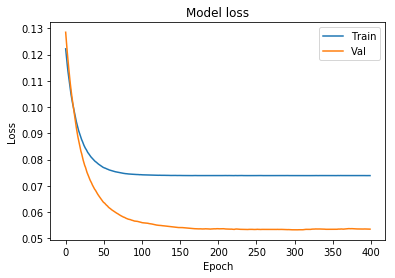

In [33]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [34]:
model = Sequential([
    Dense(28, activation='sigmoid', input_shape=(18,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])

In [35]:
epochs=400
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#model.compile(optimizer='sgd',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])
#opt = model.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer='adam',
#model.compile(optimizer=opt,
model.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [36]:
hist = model.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 7ms/step - loss: 0.1295 - accuracy: 0.1343 - val_loss: 0.1351 - val_accuracy: 0.2667
Epoch 2/400
67/67 [==============================] - 0s 228us/step - loss: 0.1231 - accuracy: 0.1642 - val_loss: 0.1308 - val_accuracy: 0.2667
Epoch 3/400
67/67 [==============================] - 0s 225us/step - loss: 0.1199 - accuracy: 0.1642 - val_loss: 0.1268 - val_accuracy: 0.2667
Epoch 4/400
67/67 [==============================] - 0s 231us/step - loss: 0.1171 - accuracy: 0.1642 - val_loss: 0.1231 - val_accuracy: 0.2667
Epoch 5/400
67/67 [==============================] - 0s 223us/step - loss: 0.1144 - accuracy: 0.1642 - val_loss: 0.1196 - val_accuracy: 0.2667
Epoch 6/400
67/67 [==============================] - 0s 218us/step - loss: 0.1118 - accuracy: 0.1642 - val_loss: 0.1166 - val_accuracy: 0.2667
Epoch 7/400
67/67 [==============================] - 0s 230us/step - loss: 0.1097 - accuracy: 0.1642

Epoch 58/400
67/67 [==============================] - 0s 292us/step - loss: 0.0765 - accuracy: 0.1642 - val_loss: 0.0631 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 282us/step - loss: 0.0764 - accuracy: 0.1642 - val_loss: 0.0629 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 261us/step - loss: 0.0763 - accuracy: 0.1642 - val_loss: 0.0626 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 292us/step - loss: 0.0762 - accuracy: 0.1642 - val_loss: 0.0624 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 262us/step - loss: 0.0761 - accuracy: 0.1642 - val_loss: 0.0622 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 244us/step - loss: 0.0761 - accuracy: 0.1642 - val_loss: 0.0619 - val_accuracy: 0.2667
Epoch 64/400
67/67 [==============================] - 0s 297us/step - loss: 0.0760 - accuracy: 0.1642 - val_loss: 0.0617 - val_accuracy:

Epoch 115/400
67/67 [==============================] - 0s 296us/step - loss: 0.0743 - accuracy: 0.1642 - val_loss: 0.0564 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 256us/step - loss: 0.0743 - accuracy: 0.1642 - val_loss: 0.0564 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 266us/step - loss: 0.0743 - accuracy: 0.1642 - val_loss: 0.0563 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 269us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 356us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 292us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 121/400
67/67 [==============================] - 0s 278us/step - loss: 0.0742 - accuracy: 0.1642 - val_loss: 0.0561 - val_ac

67/67 [==============================] - 0s 234us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 257us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 251us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 225us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 177/400
67/67 [==============================] - 0s 223us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0545 - val_accuracy: 0.2667

67/67 [==============================] - 0s 223us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 252us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 236us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 240us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0540 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 234us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 254us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 262us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0539 - val_accuracy: 0.2667

67/67 [==============================] - 0s 267us/step - loss: 0.0739 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 262us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 262us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 241us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 230us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 246us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 242us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 231us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 218us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 228us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 220us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0538 - val_accuracy: 0.2667

67/67 [==============================] - 0s 235us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 239us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 242us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 233us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 229us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 236us/step - loss: 0.0740 - accuracy: 0.1642 - val_loss: 0.0537 - val_accuracy: 0.2667


In [37]:
model.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 61us/step


0.06666667014360428

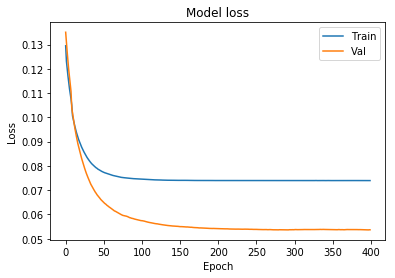

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [39]:
from keras.models import Sequential

In [40]:
#model = Sequential()
weights = model.get_weights()

In [41]:
print(weights)

[array([[ 7.11810291e-02, -8.51317644e-02, -3.23377997e-01,
        -3.33860517e-03, -8.77085924e-02, -2.89412886e-01,
         2.94505745e-01, -1.61004320e-01,  2.17674971e-02,
         1.01475596e-01, -1.74470544e-01,  2.89616078e-01,
        -1.15393713e-01, -9.64763761e-03,  1.51914448e-01,
        -2.69783556e-01,  1.81752414e-01, -1.86609000e-01,
         1.34619951e-01, -3.85341048e-02,  2.18942910e-01,
        -3.00653987e-02,  5.37597537e-02, -1.07163459e-01,
        -3.00816417e-01, -2.28698030e-01, -3.27871054e-01,
        -5.05031049e-02],
       [-3.40820283e-01, -1.75175682e-01,  2.19606012e-01,
        -1.66597217e-01,  1.74630255e-01, -3.57586384e-01,
         3.51561755e-01, -3.14800233e-01, -2.26698458e-01,
         3.44600648e-01,  3.39635402e-01, -1.30177870e-01,
         2.20131010e-01,  3.40017110e-01, -1.19639114e-01,
        -1.70186132e-01, -3.15896362e-01, -3.57159734e-01,
        -3.03375065e-01, -7.41616189e-02,  2.30632752e-01,
        -1.11090899e-01,  2.8

       [ 0.57949215]], dtype=float32), array([-0.33232296], dtype=float32)]


In [42]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 28)                532       
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 87        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 4         
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


In [43]:
Xnew = [[2002, 1.9, 1], [2012, 2, 1], [2015, 2, 4]]
Xnew = [2002, 1.9, 1]
Xnew

[2002, 1.9, 1]

In [44]:
df_t = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun,18,11,7,Error(18),Error(11),Error(7)
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,1.0000,1,0.471042,0.25,0.317105,0.352733,0.374591,-0.268421,-0.410934,-0.498362
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,0.8658,2,0.286765,0.24,0.311924,0.211901,0.264636,-0.299684,0.117077,-0.102649
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,0.9143,4,-0.143875,0.27,0.306145,0.173708,0.141427,-0.133870,0.356636,0.476196
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,0.9000,4,-0.022133,0.35,0.306674,0.104643,0.097011,0.123788,0.701019,0.722826
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,0.0554,3,0.114068,0.17,0.306662,0.175496,0.250755,-0.803895,-0.032327,-0.475027


In [45]:
dataset_t = df_t.values
Xnew = dataset_t[:,1:19]
Xnew


array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658, 2],
       [4, 3, 3, ..., 2, 0.9143, 4],
       ...,
       [6, 4, 3, ..., 1, 0.9474, 5],
       [5, 1, 1, ..., 2, 0.8824, 5],
       [2, 5, 3, ..., 3, 0.878, 5]], dtype=object)

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale = min_max_scaler.fit_transform(Xnew)

In [47]:
ynew1 = model.predict(Xnew_scale)

In [48]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew1[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.3199858] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.3102296] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.31775403] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.31662396] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.3167453] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.31720296] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.31553444] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.31824386] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.32246917] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.31681705] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2

In [49]:
ynew1
# create excel writer
# write dataframe to excel sheet named 'marks'
writer = pd.ExcelWriter('predict_cost.xlsx')
ynew1_df = pd.DataFrame (ynew1)
ynew1_df.to_excel(writer, '18')
# save the excel file
writer.save()

In [50]:
ynew3 = model3.predict(Xnew_scale)

In [51]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew3[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.28106874] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.279118] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.27807105] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.2803499] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.28806347] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.28709424] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.28140515] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.28188765] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.28215688] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.2795512] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2 

In [52]:
ynew3

array([[0.28106874],
       [0.279118  ],
       [0.27807105],
       [0.2803499 ],
       [0.28806347],
       [0.28709424],
       [0.28140515],
       [0.28188765],
       [0.28215688],
       [0.2795512 ],
       [0.2824294 ],
       [0.28168726],
       [0.2810998 ],
       [0.28892604],
       [0.28286105],
       [0.28176337],
       [0.28085113],
       [0.2828381 ],
       [0.28233033],
       [0.28266832],
       [0.28200036],
       [0.28091508],
       [0.28582996],
       [0.28514445],
       [0.2837448 ],
       [0.2819929 ],
       [0.28260204],
       [0.28324378],
       [0.28112817],
       [0.2815601 ],
       [0.28128433],
       [0.284657  ],
       [0.28300816],
       [0.28372627],
       [0.2844157 ],
       [0.28605825],
       [0.2866028 ],
       [0.2861641 ],
       [0.282318  ],
       [0.28254524],
       [0.28677022],
       [0.2805445 ],
       [0.28077173],
       [0.28245294],
       [0.28228456],
       [0.2855445 ],
       [0.28368676],
       [0.284

In [53]:
dataset

array([['Bohai Ming Zhu', 8, 5, ..., 1, 0.47104247104247104,
        0.24999999999999994],
       ['Petrojarl Varg', 5, 1, ..., 2, 0.2867647058823529, 0.24],
       ['Stybarrow Venture MV16', 4, 3, ..., 4, -0.14387464387464388,
        0.2699999999999999],
       ...,
       ['Big Foot', 6, 4, ..., 5, 0.9489862655330281, 0.2749999999999999],
       ['Heidrun TLP', 5, 1, ..., 5, 0.03940568475452196,
        0.076923076923077],
       ['Malikai TLP', 2, 5, ..., 5, 0.3679611650485437,
        0.07797270955165699]], dtype=object)

11 Features:
Region
Local Content
Lease/ Own
Planned_Cost
Hull Type
Technology Novelty
Type Unit
Water_Depth 
Lessons Learned
Oil/Gas
FEED Detail

Use only Region, Water Depth, Technology Novelty, and Lessons Learned

In [54]:
#Reduce features as per pearson correlation
#X = dataset[:,[1, 2, 4, 9, 10, 13, 14, 15, 16, 17, 18]]
X = dataset[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]

print(X.shape)

(97, 13)


In [55]:
X

array([[8, 5, 2, ..., 1, 1.0, 1],
       [5, 1, 1, ..., 1, 0.8658227848101266, 2],
       [4, 3, 1, ..., 2, 0.9142857142857143, 4],
       ...,
       [6, 4, 2, ..., 1, 0.9473684210526315, 5],
       [5, 1, 2, ..., 2, 0.8823529411764707, 5],
       [2, 5, 2, ..., 3, 0.878048780487805, 5]], dtype=object)

In [56]:
Y = dataset[:,20]

In [57]:
Y

array([0.24999999999999994, 0.24, 0.2699999999999999, 0.35000000000000014,
       0.16999999999999996, 0.3440860215053763, 0.05555555555555548,
       0.17647058823529416, 0.11999999999999993, 0.13333333333333341, 0.0,
       0.0, 0.85, 0.4, 0.0, 0.0, 0.3, 0.5000000000000001, -0.09375,
       0.5700000000000003, 0.13333333333333322, 0.32352941176470584,
       0.012027952212040005, 0.3333333333333333, 0.4112903225806451,
       0.3846153846153846, 0.3846153846153846, 0.004184100418409952,
       0.59441052, 0.2538461538461537, 0.971383147853736,
       0.00554235946159946, 0.3076923076923076, 0.19999999999999996,
       0.31099999999999994, 0.3600000000000001, 0.62, 0.52,
       0.36974789915966394, 0.6000000000000001, 0.7, 0.1924686192468619,
       0.24999999999999994, 0.0781671159029651, 0.20000000000000004,
       0.04086956521739138, 0.044000000000000004, 0.38888888888888884,
       0.98, 0.3999999999999999, 0.08333333333333341, 0.08333333333333341,
       0.8500000000000002, 0.0,

In [58]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [59]:
X_scale

array([[1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.        , 0.        , ..., 0.        , 0.85795105,
        0.25      ],
       [0.42857143, 0.5       , 0.        , ..., 0.25      , 0.90925714,
        0.75      ],
       ...,
       [0.71428571, 0.75      , 1.        , ..., 0.        , 0.9442807 ,
        1.        ],
       [0.57142857, 0.        , 1.        , ..., 0.25      , 0.87545098,
        1.        ],
       [0.14285714, 1.        , 1.        , ..., 0.5       , 0.87089431,
        1.        ]])

In [60]:
min_max_scaler2 = preprocessing.MinMaxScaler()
#Y_scale = min_max_scaler2.fit_transform(Y)

In [61]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [62]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [63]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 13) (15, 13) (15, 13) (67,) (15,) (15,)


In [64]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [65]:
# define 10-fold cross validation test harness
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

In [66]:
for train, test in kfold.split(X_scale, Y):
# create model
	model4 = Sequential()
	model4.add(Dense(13, input_dim=13, activation='sigmoid'))
	model4.add(Dense(26, activation='sigmoid'))
	model4.add(Dense(8, activation='sigmoid'))
	model4.add(Dense(1, activation='sigmoid'))
	# Compile model
	model4.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model4.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model4.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [67]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model5 = Sequential([
        Dense(26, activation='sigmoid', input_shape=(13,)),
        Dense(13, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model5.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model5.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model5.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 7ms/step - loss: 0.1081 - accuracy: 0.1343 - val_loss: 0.1170 - val_accuracy: 0.2000
Epoch 2/400
67/67 [==============================] - 0s 258us/step - loss: 0.1044 - accuracy: 0.1343 - val_loss: 0.1131 - val_accuracy: 0.2000
Epoch 3/400
67/67 [==============================] - 0s 246us/step - loss: 0.1013 - accuracy: 0.1343 - val_loss: 0.1091 - val_accuracy: 0.2000
Epoch 4/400
67/67 [==============================] - 0s 265us/step - loss: 0.0983 - accuracy: 0.1343 - val_loss: 0.1054 - val_accuracy: 0.2000
Epoch 5/400
67/67 [==============================] - 0s 254us/step - loss: 0.0956 - accuracy: 0.1343 - val_loss: 0.1022 - val_accuracy: 0.2000
Epoch 6/400
67/67 [==============================] - 0s 256us/step - loss: 0.0932 - accuracy: 0.1343 - val_loss: 0.0996 - val_accuracy: 0.2000
Epoch 7/400
67/67 [==============================] - 0s 258us/step - loss: 0.0913 - accuracy: 0.1343

67/67 [==============================] - 0s 257us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 58/400
67/67 [==============================] - 0s 245us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 59/400
67/67 [==============================] - 0s 261us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0700 - val_accuracy: 0.2000
Epoch 60/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0699 - val_accuracy: 0.2000
Epoch 61/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0698 - val_accuracy: 0.2000
Epoch 62/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0698 - val_accuracy: 0.2000
Epoch 63/400
67/67 [==============================] - 0s 239us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0697 - val_accuracy: 0.2000
Epoch

Epoch 114/400
67/67 [==============================] - 0s 231us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 115/400
67/67 [==============================] - 0s 232us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 116/400
67/67 [==============================] - 0s 230us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 117/400
67/67 [==============================] - 0s 233us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 118/400
67/67 [==============================] - 0s 227us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 119/400
67/67 [==============================] - 0s 241us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 120/400
67/67 [==============================] - 0s 228us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_ac

67/67 [==============================] - 0s 242us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 171/400
67/67 [==============================] - 0s 233us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 172/400
67/67 [==============================] - 0s 231us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 173/400
67/67 [==============================] - 0s 241us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 174/400
67/67 [==============================] - 0s 241us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 175/400
67/67 [==============================] - 0s 225us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 176/400
67/67 [==============================] - 0s 239us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000

67/67 [==============================] - 0s 243us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 227/400
67/67 [==============================] - 0s 239us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 228/400
67/67 [==============================] - 0s 238us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 229/400
67/67 [==============================] - 0s 235us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 230/400
67/67 [==============================] - 0s 242us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 231/400
67/67 [==============================] - 0s 237us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 232/400
67/67 [==============================] - 0s 248us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 246us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 283/400
67/67 [==============================] - 0s 264us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 284/400
67/67 [==============================] - 0s 261us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 285/400
67/67 [==============================] - 0s 258us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 286/400
67/67 [==============================] - 0s 242us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 287/400
67/67 [==============================] - 0s 246us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0680 - val_accuracy: 0.2000
Epoch 288/400
67/67 [==============================] - 0s 242us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000

67/67 [==============================] - 0s 290us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 339/400
67/67 [==============================] - 0s 272us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 340/400
67/67 [==============================] - 0s 267us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 341/400
67/67 [==============================] - 0s 264us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 342/400
67/67 [==============================] - 0s 275us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 343/400
67/67 [==============================] - 0s 294us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 344/400
67/67 [==============================] - 0s 311us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 236us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 395/400
67/67 [==============================] - 0s 223us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 396/400
67/67 [==============================] - 0s 227us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 397/400
67/67 [==============================] - 0s 227us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 398/400
67/67 [==============================] - 0s 273us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 399/400
67/67 [==============================] - 0s 235us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 400/400
67/67 [==============================] - 0s 226us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000

67/67 [==============================] - 0s 250us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0722 - val_accuracy: 0.2000
Epoch 51/400
67/67 [==============================] - 0s 253us/step - loss: 0.0739 - accuracy: 0.1343 - val_loss: 0.0721 - val_accuracy: 0.2000
Epoch 52/400
67/67 [==============================] - 0s 254us/step - loss: 0.0739 - accuracy: 0.1343 - val_loss: 0.0719 - val_accuracy: 0.2000
Epoch 53/400
67/67 [==============================] - 0s 243us/step - loss: 0.0738 - accuracy: 0.1343 - val_loss: 0.0717 - val_accuracy: 0.2000
Epoch 54/400
67/67 [==============================] - 0s 245us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0715 - val_accuracy: 0.2000
Epoch 55/400
67/67 [==============================] - 0s 244us/step - loss: 0.0736 - accuracy: 0.1343 - val_loss: 0.0713 - val_accuracy: 0.2000
Epoch 56/400
67/67 [==============================] - 0s 232us/step - loss: 0.0735 - accuracy: 0.1343 - val_loss: 0.0712 - val_accuracy: 0.2000
Epoch

Epoch 107/400
67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 108/400
67/67 [==============================] - 0s 244us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 109/400
67/67 [==============================] - 0s 245us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 110/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 111/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 112/400
67/67 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 113/400
67/67 [==============================] - 0s 292us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_ac

67/67 [==============================] - 0s 258us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 164/400
67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 165/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 166/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 167/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 168/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 169/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 220/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 221/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 222/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 223/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 224/400
67/67 [==============================] - 0s 259us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 225/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 276/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 277/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 278/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 279/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 280/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 281/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 265us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 332/400
67/67 [==============================] - 0s 348us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 333/400
67/67 [==============================] - 0s 313us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 334/400
67/67 [==============================] - 0s 258us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 335/400
67/67 [==============================] - 0s 352us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 336/400
67/67 [==============================] - 0s 307us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 337/400
67/67 [==============================] - 0s 303us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 278us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 388/400
67/67 [==============================] - 0s 296us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 389/400
67/67 [==============================] - 0s 303us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 390/400
67/67 [==============================] - 0s 277us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 391/400
67/67 [==============================] - 0s 333us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 392/400
67/67 [==============================] - 0s 307us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 393/400
67/67 [==============================] - 0s 280us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 230us/step - loss: 0.0746 - accuracy: 0.1343 - val_loss: 0.0739 - val_accuracy: 0.2000
Epoch 44/400
67/67 [==============================] - 0s 297us/step - loss: 0.0745 - accuracy: 0.1343 - val_loss: 0.0736 - val_accuracy: 0.2000
Epoch 45/400
67/67 [==============================] - 0s 290us/step - loss: 0.0744 - accuracy: 0.1343 - val_loss: 0.0734 - val_accuracy: 0.2000
Epoch 46/400
67/67 [==============================] - 0s 281us/step - loss: 0.0742 - accuracy: 0.1343 - val_loss: 0.0731 - val_accuracy: 0.2000
Epoch 47/400
67/67 [==============================] - 0s 291us/step - loss: 0.0742 - accuracy: 0.1343 - val_loss: 0.0729 - val_accuracy: 0.2000
Epoch 48/400
67/67 [==============================] - 0s 284us/step - loss: 0.0741 - accuracy: 0.1343 - val_loss: 0.0726 - val_accuracy: 0.2000
Epoch 49/400
67/67 [==============================] - 0s 295us/step - loss: 0.0740 - accuracy: 0.1343 - val_loss: 0.0724 - val_accuracy: 0.2000
Epoch

Epoch 100/400
67/67 [==============================] - 0s 231us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 101/400
67/67 [==============================] - 0s 290us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 102/400
67/67 [==============================] - 0s 320us/step - loss: 0.0728 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 103/400
67/67 [==============================] - 0s 306us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 104/400
67/67 [==============================] - 0s 281us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 105/400
67/67 [==============================] - 0s 284us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 106/400
67/67 [==============================] - 0s 287us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0686 - val_ac

67/67 [==============================] - 0s 261us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 157/400
67/67 [==============================] - 0s 255us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 158/400
67/67 [==============================] - 0s 268us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 159/400
67/67 [==============================] - 0s 260us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 160/400
67/67 [==============================] - 0s 245us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 161/400
67/67 [==============================] - 0s 253us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 162/400
67/67 [==============================] - 0s 269us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 261us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 213/400
67/67 [==============================] - 0s 258us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 214/400
67/67 [==============================] - 0s 261us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 215/400
67/67 [==============================] - 0s 251us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 216/400
67/67 [==============================] - 0s 263us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 217/400
67/67 [==============================] - 0s 250us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 218/400
67/67 [==============================] - 0s 251us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 247us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 269/400
67/67 [==============================] - 0s 250us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 270/400
67/67 [==============================] - 0s 242us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 271/400
67/67 [==============================] - 0s 240us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 272/400
67/67 [==============================] - 0s 270us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 273/400
67/67 [==============================] - 0s 310us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 274/400
67/67 [==============================] - 0s 281us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 245us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 325/400
67/67 [==============================] - 0s 244us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 326/400
67/67 [==============================] - 0s 238us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 327/400
67/67 [==============================] - 0s 227us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 328/400
67/67 [==============================] - 0s 256us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 329/400
67/67 [==============================] - 0s 227us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 330/400
67/67 [==============================] - 0s 224us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 268us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 381/400
67/67 [==============================] - 0s 268us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 382/400
67/67 [==============================] - 0s 254us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 383/400
67/67 [==============================] - 0s 251us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 384/400
67/67 [==============================] - 0s 244us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 385/400
67/67 [==============================] - 0s 250us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 386/400
67/67 [==============================] - 0s 246us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 232us/step - loss: 0.0734 - accuracy: 0.1343 - val_loss: 0.0707 - val_accuracy: 0.2000
Epoch 37/400
67/67 [==============================] - 0s 266us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0706 - val_accuracy: 0.2000
Epoch 38/400
67/67 [==============================] - 0s 263us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0706 - val_accuracy: 0.2000
Epoch 39/400
67/67 [==============================] - 0s 237us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0705 - val_accuracy: 0.2000
Epoch 40/400
67/67 [==============================] - 0s 241us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0704 - val_accuracy: 0.2000
Epoch 41/400
67/67 [==============================] - 0s 245us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch 42/400
67/67 [==============================] - 0s 246us/step - loss: 0.0733 - accuracy: 0.1343 - val_loss: 0.0703 - val_accuracy: 0.2000
Epoch

Epoch 93/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 94/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 95/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 96/400
67/67 [==============================] - 0s 220us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 97/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 98/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 99/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy:

67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 150/400
67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 151/400
67/67 [==============================] - 0s 219us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 152/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 153/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 154/400
67/67 [==============================] - 0s 249us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 155/400
67/67 [==============================] - 0s 296us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 206/400
67/67 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 207/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 208/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 209/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 210/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 211/400
67/67 [==============================] - 0s 253us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 262/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 263/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 264/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 265/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 266/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 267/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 318/400
67/67 [==============================] - 0s 267us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 319/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 320/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 321/400
67/67 [==============================] - 0s 246us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 322/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 323/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 374/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 375/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 376/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 377/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 378/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 379/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 286us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 30/400
67/67 [==============================] - 0s 253us/step - loss: 0.0727 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 31/400
67/67 [==============================] - 0s 230us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 32/400
67/67 [==============================] - 0s 231us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 33/400
67/67 [==============================] - 0s 238us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0694 - val_accuracy: 0.2000
Epoch 34/400
67/67 [==============================] - 0s 236us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 35/400
67/67 [==============================] - 0s 230us/step - loss: 0.0726 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch

Epoch 86/400
67/67 [==============================] - 0s 237us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 87/400
67/67 [==============================] - 0s 261us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 88/400
67/67 [==============================] - 0s 235us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 89/400
67/67 [==============================] - 0s 232us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 90/400
67/67 [==============================] - 0s 230us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 91/400
67/67 [==============================] - 0s 228us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 92/400
67/67 [==============================] - 0s 226us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy:

67/67 [==============================] - 0s 239us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 143/400
67/67 [==============================] - 0s 235us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 144/400
67/67 [==============================] - 0s 237us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 145/400
67/67 [==============================] - 0s 259us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 146/400
67/67 [==============================] - 0s 229us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 147/400
67/67 [==============================] - 0s 235us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 148/400
67/67 [==============================] - 0s 230us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 242us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 199/400
67/67 [==============================] - 0s 237us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 200/400
67/67 [==============================] - 0s 233us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 201/400
67/67 [==============================] - 0s 230us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 202/400
67/67 [==============================] - 0s 231us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 203/400
67/67 [==============================] - 0s 240us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 204/400
67/67 [==============================] - 0s 237us/step - loss: 0.0725 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 234us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 255/400
67/67 [==============================] - 0s 226us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 256/400
67/67 [==============================] - 0s 224us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 257/400
67/67 [==============================] - 0s 235us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 258/400
67/67 [==============================] - 0s 237us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 259/400
67/67 [==============================] - 0s 244us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 260/400
67/67 [==============================] - 0s 242us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 229us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 311/400
67/67 [==============================] - 0s 242us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 312/400
67/67 [==============================] - 0s 236us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 313/400
67/67 [==============================] - 0s 318us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 314/400
67/67 [==============================] - 0s 271us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 315/400
67/67 [==============================] - 0s 280us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 316/400
67/67 [==============================] - 0s 291us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 254us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 367/400
67/67 [==============================] - 0s 311us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 368/400
67/67 [==============================] - 0s 239us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 369/400
67/67 [==============================] - 0s 260us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 370/400
67/67 [==============================] - 0s 256us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 371/400
67/67 [==============================] - 0s 244us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 372/400
67/67 [==============================] - 0s 241us/step - loss: 0.0724 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 273us/step - loss: 0.0811 - accuracy: 0.1343 - val_loss: 0.0836 - val_accuracy: 0.2000
Epoch 23/400
67/67 [==============================] - 0s 241us/step - loss: 0.0803 - accuracy: 0.1343 - val_loss: 0.0826 - val_accuracy: 0.2000
Epoch 24/400
67/67 [==============================] - 0s 268us/step - loss: 0.0797 - accuracy: 0.1343 - val_loss: 0.0818 - val_accuracy: 0.2000
Epoch 25/400
67/67 [==============================] - 0s 268us/step - loss: 0.0792 - accuracy: 0.1343 - val_loss: 0.0810 - val_accuracy: 0.2000
Epoch 26/400
67/67 [==============================] - 0s 236us/step - loss: 0.0787 - accuracy: 0.1343 - val_loss: 0.0802 - val_accuracy: 0.2000
Epoch 27/400
67/67 [==============================] - 0s 263us/step - loss: 0.0782 - accuracy: 0.1343 - val_loss: 0.0795 - val_accuracy: 0.2000
Epoch 28/400
67/67 [==============================] - 0s 237us/step - loss: 0.0778 - accuracy: 0.1343 - val_loss: 0.0788 - val_accuracy: 0.2000
Epoch

Epoch 79/400
67/67 [==============================] - 0s 259us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0693 - val_accuracy: 0.2000
Epoch 80/400
67/67 [==============================] - 0s 227us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 81/400
67/67 [==============================] - 0s 255us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0692 - val_accuracy: 0.2000
Epoch 82/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 83/400
67/67 [==============================] - 0s 233us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 84/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch 85/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy:

67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 136/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 137/400
67/67 [==============================] - 0s 221us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 138/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 139/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 140/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 141/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 192/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 193/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 194/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 195/400
67/67 [==============================] - 0s 246us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 196/400
67/67 [==============================] - 0s 401us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 197/400
67/67 [==============================] - 0s 283us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 248/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 249/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 250/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 251/400
67/67 [==============================] - 0s 223us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 252/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 253/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 222us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 304/400
67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 305/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 306/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 307/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 308/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 309/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 225us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 360/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 361/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 362/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 363/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 364/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 365/400
67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 235us/step - loss: 0.0809 - accuracy: 0.1343 - val_loss: 0.0835 - val_accuracy: 0.2000
Epoch 16/400
67/67 [==============================] - 0s 231us/step - loss: 0.0802 - accuracy: 0.1343 - val_loss: 0.0823 - val_accuracy: 0.2000
Epoch 17/400
67/67 [==============================] - 0s 233us/step - loss: 0.0795 - accuracy: 0.1343 - val_loss: 0.0812 - val_accuracy: 0.2000
Epoch 18/400
67/67 [==============================] - 0s 221us/step - loss: 0.0788 - accuracy: 0.1343 - val_loss: 0.0804 - val_accuracy: 0.2000
Epoch 19/400
67/67 [==============================] - 0s 233us/step - loss: 0.0783 - accuracy: 0.1343 - val_loss: 0.0795 - val_accuracy: 0.2000
Epoch 20/400
67/67 [==============================] - 0s 245us/step - loss: 0.0777 - accuracy: 0.1343 - val_loss: 0.0787 - val_accuracy: 0.2000
Epoch 21/400
67/67 [==============================] - 0s 226us/step - loss: 0.0773 - accuracy: 0.1343 - val_loss: 0.0780 - val_accuracy: 0.2000
Epoch

Epoch 72/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch 73/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 74/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 75/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 76/400
67/67 [==============================] - 0s 231us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0689 - val_accuracy: 0.2000
Epoch 77/400
67/67 [==============================] - 0s 221us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 78/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy:

Epoch 129/400
67/67 [==============================] - 0s 251us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 130/400
67/67 [==============================] - 0s 256us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 131/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 132/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 133/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 134/400
67/67 [==============================] - 0s 225us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 135/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_ac

67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 186/400
67/67 [==============================] - 0s 218us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 187/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 188/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 189/400
67/67 [==============================] - 0s 252us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 190/400
67/67 [==============================] - 0s 275us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 191/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 242/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 243/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 244/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 245/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 246/400
67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 247/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 298/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 299/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 300/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 301/400
67/67 [==============================] - 0s 222us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 302/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 303/400
67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 354/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 355/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 356/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 357/400
67/67 [==============================] - 0s 250us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 358/400
67/67 [==============================] - 0s 244us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 359/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

Epoch 9/400
67/67 [==============================] - 0s 228us/step - loss: 0.2995 - accuracy: 0.0000e+00 - val_loss: 0.3275 - val_accuracy: 0.0000e+00
Epoch 10/400
67/67 [==============================] - 0s 234us/step - loss: 0.2864 - accuracy: 0.0000e+00 - val_loss: 0.3131 - val_accuracy: 0.0000e+00
Epoch 11/400
67/67 [==============================] - 0s 240us/step - loss: 0.2733 - accuracy: 0.0000e+00 - val_loss: 0.2995 - val_accuracy: 0.0000e+00
Epoch 12/400
67/67 [==============================] - 0s 228us/step - loss: 0.2611 - accuracy: 0.0000e+00 - val_loss: 0.2860 - val_accuracy: 0.0000e+00
Epoch 13/400
67/67 [==============================] - 0s 236us/step - loss: 0.2489 - accuracy: 0.0000e+00 - val_loss: 0.2724 - val_accuracy: 0.0000e+00
Epoch 14/400
67/67 [==============================] - 0s 224us/step - loss: 0.2367 - accuracy: 0.0000e+00 - val_loss: 0.2591 - val_accuracy: 0.0000e+00
Epoch 15/400
67/67 [==============================] - 0s 233us/step - loss: 0.2249 - accu

Epoch 65/400
67/67 [==============================] - 0s 237us/step - loss: 0.0772 - accuracy: 0.1343 - val_loss: 0.0781 - val_accuracy: 0.2000
Epoch 66/400
67/67 [==============================] - 0s 231us/step - loss: 0.0770 - accuracy: 0.1343 - val_loss: 0.0776 - val_accuracy: 0.2000
Epoch 67/400
67/67 [==============================] - 0s 234us/step - loss: 0.0767 - accuracy: 0.1343 - val_loss: 0.0772 - val_accuracy: 0.2000
Epoch 68/400
67/67 [==============================] - 0s 279us/step - loss: 0.0765 - accuracy: 0.1343 - val_loss: 0.0768 - val_accuracy: 0.2000
Epoch 69/400
67/67 [==============================] - 0s 252us/step - loss: 0.0762 - accuracy: 0.1343 - val_loss: 0.0765 - val_accuracy: 0.2000
Epoch 70/400
67/67 [==============================] - 0s 237us/step - loss: 0.0761 - accuracy: 0.1343 - val_loss: 0.0763 - val_accuracy: 0.2000
Epoch 71/400
67/67 [==============================] - 0s 227us/step - loss: 0.0759 - accuracy: 0.1343 - val_loss: 0.0759 - val_accuracy:

Epoch 122/400
67/67 [==============================] - 0s 232us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 123/400
67/67 [==============================] - 0s 239us/step - loss: 0.0731 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 124/400
67/67 [==============================] - 0s 244us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 125/400
67/67 [==============================] - 0s 226us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 126/400
67/67 [==============================] - 0s 243us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0695 - val_accuracy: 0.2000
Epoch 127/400
67/67 [==============================] - 0s 246us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0696 - val_accuracy: 0.2000
Epoch 128/400
67/67 [==============================] - 0s 227us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0695 - val_ac

67/67 [==============================] - 0s 249us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 179/400
67/67 [==============================] - 0s 252us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 180/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 181/400
67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 182/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 183/400
67/67 [==============================] - 0s 254us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 184/400
67/67 [==============================] - 0s 251us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000

67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 235/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 236/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 237/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 238/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 239/400
67/67 [==============================] - 0s 240us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 240/400
67/67 [==============================] - 0s 237us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 291/400
67/67 [==============================] - 0s 223us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 292/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 293/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 294/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 295/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 296/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 347/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 348/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 349/400
67/67 [==============================] - 0s 221us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 350/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0681 - val_accuracy: 0.2000
Epoch 351/400
67/67 [==============================] - 0s 223us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 352/400
67/67 [==============================] - 0s 229us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000

67/67 [==============================] - 0s 236us/step - loss: 0.2781 - accuracy: 0.0000e+00 - val_loss: 0.3011 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 230us/step - loss: 0.2610 - accuracy: 0.0000e+00 - val_loss: 0.2818 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 240us/step - loss: 0.2437 - accuracy: 0.0000e+00 - val_loss: 0.2633 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 233us/step - loss: 0.2272 - accuracy: 0.0000e+00 - val_loss: 0.2460 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 229us/step - loss: 0.2120 - accuracy: 0.0000e+00 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] - 0s 234us/step - loss: 0.1969 - accuracy: 0.0000e+00 - val_loss: 0.2131 - val_accuracy: 0.0000e+00
Epoch 8/400
67/67 [==============================] - 0s 235us/step - loss: 0.1831 - accuracy: 0.0000e+00 -

67/67 [==============================] - 0s 240us/step - loss: 0.0741 - accuracy: 0.1343 - val_loss: 0.0721 - val_accuracy: 0.2000
Epoch 59/400
67/67 [==============================] - 0s 226us/step - loss: 0.0739 - accuracy: 0.1343 - val_loss: 0.0718 - val_accuracy: 0.2000
Epoch 60/400
67/67 [==============================] - 0s 227us/step - loss: 0.0739 - accuracy: 0.1343 - val_loss: 0.0716 - val_accuracy: 0.2000
Epoch 61/400
67/67 [==============================] - 0s 227us/step - loss: 0.0738 - accuracy: 0.1343 - val_loss: 0.0716 - val_accuracy: 0.2000
Epoch 62/400
67/67 [==============================] - 0s 237us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0714 - val_accuracy: 0.2000
Epoch 63/400
67/67 [==============================] - 0s 240us/step - loss: 0.0737 - accuracy: 0.1343 - val_loss: 0.0713 - val_accuracy: 0.2000
Epoch 64/400
67/67 [==============================] - 0s 224us/step - loss: 0.0736 - accuracy: 0.1343 - val_loss: 0.0712 - val_accuracy: 0.2000
Epoch

Epoch 115/400
67/67 [==============================] - 0s 227us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 116/400
67/67 [==============================] - 0s 227us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 117/400
67/67 [==============================] - 0s 251us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 118/400
67/67 [==============================] - 0s 232us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 119/400
67/67 [==============================] - 0s 226us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_accuracy: 0.2000
Epoch 120/400
67/67 [==============================] - 0s 236us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0687 - val_accuracy: 0.2000
Epoch 121/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0688 - val_ac

67/67 [==============================] - 0s 234us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 172/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 173/400
67/67 [==============================] - 0s 240us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 174/400
67/67 [==============================] - 0s 236us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 175/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 176/400
67/67 [==============================] - 0s 238us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 177/400
67/67 [==============================] - 0s 230us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 230us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 228/400
67/67 [==============================] - 0s 231us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 229/400
67/67 [==============================] - 0s 264us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 230/400
67/67 [==============================] - 0s 237us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 231/400
67/67 [==============================] - 0s 232us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 232/400
67/67 [==============================] - 0s 233us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 233/400
67/67 [==============================] - 0s 238us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 224us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 284/400
67/67 [==============================] - 0s 246us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 285/400
67/67 [==============================] - 0s 242us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 286/400
67/67 [==============================] - 0s 231us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 287/400
67/67 [==============================] - 0s 267us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 288/400
67/67 [==============================] - 0s 232us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0682 - val_accuracy: 0.2000
Epoch 289/400
67/67 [==============================] - 0s 236us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 232us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 340/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 341/400
67/67 [==============================] - 0s 239us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 342/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 343/400
67/67 [==============================] - 0s 240us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 344/400
67/67 [==============================] - 0s 239us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 345/400
67/67 [==============================] - 0s 236us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 249us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 396/400
67/67 [==============================] - 0s 238us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 397/400
67/67 [==============================] - 0s 236us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 398/400
67/67 [==============================] - 0s 227us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 399/400
67/67 [==============================] - 0s 228us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 400/400
67/67 [==============================] - 0s 232us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.1343 -

Epoch 52/400
67/67 [==============================] - 0s 231us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 53/400
67/67 [==============================] - 0s 231us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch 54/400
67/67 [==============================] - 0s 235us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 55/400
67/67 [==============================] - 0s 228us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 56/400
67/67 [==============================] - 0s 230us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0691 - val_accuracy: 0.2000
Epoch 57/400
67/67 [==============================] - 0s 229us/step - loss: 0.0730 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy: 0.2000
Epoch 58/400
67/67 [==============================] - 0s 238us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0690 - val_accuracy:

Epoch 109/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 110/400
67/67 [==============================] - 0s 245us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 111/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0686 - val_accuracy: 0.2000
Epoch 112/400
67/67 [==============================] - 0s 225us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 113/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 114/400
67/67 [==============================] - 0s 241us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 115/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_ac

67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 166/400
67/67 [==============================] - 0s 224us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 167/400
67/67 [==============================] - 0s 233us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 168/400
67/67 [==============================] - 0s 266us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 169/400
67/67 [==============================] - 0s 243us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 170/400
67/67 [==============================] - 0s 227us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 171/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000

67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 222/400
67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 223/400
67/67 [==============================] - 0s 223us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 224/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 225/400
67/67 [==============================] - 0s 242us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 226/400
67/67 [==============================] - 0s 257us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 227/400
67/67 [==============================] - 0s 314us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 282us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 278/400
67/67 [==============================] - 0s 271us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 279/400
67/67 [==============================] - 0s 274us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 280/400
67/67 [==============================] - 0s 279us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 281/400
67/67 [==============================] - 0s 284us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 282/400
67/67 [==============================] - 0s 276us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 283/400
67/67 [==============================] - 0s 306us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

67/67 [==============================] - 0s 234us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 334/400
67/67 [==============================] - 0s 236us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 335/400
67/67 [==============================] - 0s 232us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 336/400
67/67 [==============================] - 0s 235us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 337/400
67/67 [==============================] - 0s 247us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 338/400
67/67 [==============================] - 0s 239us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000
Epoch 339/400
67/67 [==============================] - 0s 226us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0685 - val_accuracy: 0.2000

67/67 [==============================] - 0s 269us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 390/400
67/67 [==============================] - 0s 272us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 391/400
67/67 [==============================] - 0s 270us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 392/400
67/67 [==============================] - 0s 257us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0683 - val_accuracy: 0.2000
Epoch 393/400
67/67 [==============================] - 0s 250us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 394/400
67/67 [==============================] - 0s 250us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000
Epoch 395/400
67/67 [==============================] - 0s 258us/step - loss: 0.0729 - accuracy: 0.1343 - val_loss: 0.0684 - val_accuracy: 0.2000

In [68]:
model4.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 74us/step


0.2666666805744171

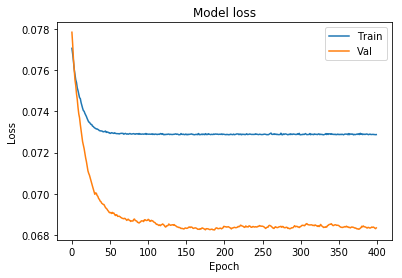

In [69]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [74]:
df_t2 = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t2.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun,18,11,7,Error(18),Error(11),Error(7)
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,1.0000,1,0.471042,0.25,0.317105,0.352733,0.374591,-0.268421,-0.410934,-0.498362
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,0.8658,2,0.286765,0.24,0.311924,0.211901,0.264636,-0.299684,0.117077,-0.102649
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,0.9143,4,-0.143875,0.27,0.306145,0.173708,0.141427,-0.133870,0.356636,0.476196
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,0.9000,4,-0.022133,0.35,0.306674,0.104643,0.097011,0.123788,0.701019,0.722826
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,0.0554,3,0.114068,0.17,0.306662,0.175496,0.250755,-0.803895,-0.032327,-0.475027


In [75]:
dataset_t2 = df_t2.values
Xnew2 = dataset_t2[:,[1, 2, 4, 9, 10, 11, 12,13, 14, 15, 16, 17, 18]]
print(Xnew2.shape)
print(Xnew2)

(103, 13)
[[8 5 2 ... 1 1.0 1]
 [5 1 1 ... 1 0.8658 2]
 [4 3 1 ... 2 0.9143 4]
 ...
 [6 4 2 ... 1 0.9474 5]
 [5 1 2 ... 2 0.8824 5]
 [2 5 2 ... 3 0.878 5]]


In [76]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew2)

In [77]:
ynew4 = model4.predict(Xnew_scale2)

In [78]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew4[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.29156703] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.26031098] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.2551916] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.23722166] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.2506727] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.29977816] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.23375669] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.24565297] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.2850089] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.23459217] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2

In [79]:
print(ynew4)

[[0.29156703]
 [0.26031098]
 [0.2551916 ]
 [0.23722166]
 [0.2506727 ]
 [0.29977816]
 [0.23375669]
 [0.24565297]
 [0.2850089 ]
 [0.23459217]
 [0.24613148]
 [0.24570456]
 [0.26018995]
 [0.29222697]
 [0.23657653]
 [0.24229136]
 [0.25604922]
 [0.27122998]
 [0.28258848]
 [0.24753839]
 [0.2661782 ]
 [0.25443208]
 [0.2779571 ]
 [0.25900564]
 [0.2672755 ]
 [0.2646075 ]
 [0.26577938]
 [0.28571725]
 [0.2755314 ]
 [0.260441  ]
 [0.2413778 ]
 [0.2796535 ]
 [0.30946434]
 [0.2661102 ]
 [0.26450485]
 [0.29653066]
 [0.289271  ]
 [0.26258284]
 [0.29394794]
 [0.30331802]
 [0.28504336]
 [0.24709857]
 [0.2666263 ]
 [0.2751326 ]
 [0.26719433]
 [0.25666994]
 [0.27283376]
 [0.2716399 ]
 [0.24976945]
 [0.24207222]
 [0.28109527]
 [0.2715673 ]
 [0.2808063 ]
 [0.30489045]
 [0.28556675]
 [0.30588064]
 [0.24115884]
 [0.30804724]
 [0.26429534]
 [0.2905596 ]
 [0.27067718]
 [0.25354862]
 [0.28270897]
 [0.2619546 ]
 [0.24233711]
 [0.2635581 ]
 [0.23188457]
 [0.30578053]
 [0.2358231 ]
 [0.24721918]
 [0.2876897 ]
 [0.32

7 Features:
Region
Local Content
Lease/ Own
Technology Novelty
Type Unit
Lessons Learned
FEED Detail

In [80]:
#Reduce features further as per pearson correlation
X = dataset[:,[1, 2, 12, 13, 14, 16, 18]]

In [81]:
Y = dataset[:,20]

In [82]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [83]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [84]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [85]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(67, 7) (15, 7) (15, 7) (67,) (15,) (15,)


In [86]:
for train, test in kfold.split(X_scale, Y):
# create model
	model6 = Sequential()
	model6.add(Dense(12, input_dim=7, activation='relu'))
	model6.add(Dense(8, activation='relu'))
	model6.add(Dense(1, activation='sigmoid'))
	# Compile model
	model6.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
	# Fit the model
	model6.fit(X_scale[train], Y[train], epochs=150, batch_size=9, verbose=0)
	# evaluate the model
	scores = model6.evaluate(X_scale[train], Y[train], verbose=0)
	print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 16.09%
accuracy: 17.24%
accuracy: 18.39%
accuracy: 18.39%
accuracy: 16.09%
accuracy: 14.94%
accuracy: 14.94%
accuracy: 15.91%
accuracy: 18.18%
accuracy: 14.77%
16.50% (+/- 1.38%)


In [87]:
cvscores2 = []
for train, test in kfold.split(X_train, Y_train):
# create model
    model7 = Sequential([
        Dense(14, activation='sigmoid', input_shape=(7,)),
        Dense(7, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ])
    epochs=400
    learning_rate = 0.1
    decay_rate = learning_rate / epochs
    momentum = 0.8
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model7.compile(optimizer='sgd',
              loss='mse',              
              metrics=['accuracy'])
    hist3 = model7.fit(X_train, Y_train,
          batch_size=9, epochs=epochs,
          validation_data=(X_val, Y_val))
    scores = model7.evaluate(X_scale[train], Y[train], verbose=0)
    cvscores2.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores2), np.std(cvscores)))

Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 2s 30ms/step - loss: 0.1615 - accuracy: 0.0000e+00 - val_loss: 0.1827 - val_accuracy: 0.0000e+00
Epoch 2/400
67/67 [==============================] - 0s 766us/step - loss: 0.1554 - accuracy: 0.0000e+00 - val_loss: 0.1758 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.0000e+00 - val_loss: 0.1688 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.0000e+00 - val_loss: 0.1625 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 5ms/step - loss: 0.1392 - accuracy: 0.0000e+00 - val_loss: 0.1564 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 498us/step - loss: 0.1344 - accuracy: 0.0000e+00 - val_loss: 0.1509 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] - 0s 1

67/67 [==============================] - 0s 369us/step - loss: 0.0682 - accuracy: 0.1493 - val_loss: 0.0619 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 397us/step - loss: 0.0680 - accuracy: 0.1493 - val_loss: 0.0615 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 350us/step - loss: 0.0678 - accuracy: 0.1493 - val_loss: 0.0611 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 388us/step - loss: 0.0677 - accuracy: 0.1493 - val_loss: 0.0608 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 391us/step - loss: 0.0675 - accuracy: 0.1493 - val_loss: 0.0605 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 457us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0601 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 363us/step - loss: 0.0672 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch

Epoch 114/400
67/67 [==============================] - 0s 383us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 324us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 315us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 292us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 279us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 318us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 278us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0535 - val_ac

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.106852). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


67/67 [==============================] - 0s 663us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 166/400
67/67 [==============================] - 1s 8ms/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 167/400
67/67 [==============================] - 0s 571us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 727us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 477us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 170/400
 9/67 [===>..........................] - ETA: 0s - loss: 0.0706 - accuracy: 0.1111

/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.482649). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/Users/ananthnatarajan/anaconda3/lib/python3.6/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.245154). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


67/67 [==============================] - 0s 479us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 896us/step - loss: 0.0646 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 177

Epoch 227/400
67/67 [==============================] - 0s 507us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 477us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 489us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 409us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 351us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 383us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 421us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0516 - val_ac

67/67 [==============================] - 0s 316us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0515 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 383us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0515 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 289us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0515 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 364us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 278us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 348us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 266us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667

67/67 [==============================] - 0s 449us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 521us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 337us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 489us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 915us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 867us/step - loss: 0.0637 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
E

67/67 [==============================] - 0s 315us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 305us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 294us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 306us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 257us/step - loss: 0.0635 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 361us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0508 - val_accuracy: 0.2667
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 1s 8ms/step - loss: 0.1468 - accuracy: 0.0000e+

67/67 [==============================] - 0s 223us/step - loss: 0.0706 - accuracy: 0.1493 - val_loss: 0.0710 - val_accuracy: 0.2667
Epoch 52/400
67/67 [==============================] - 0s 230us/step - loss: 0.0704 - accuracy: 0.1493 - val_loss: 0.0706 - val_accuracy: 0.2667
Epoch 53/400
67/67 [==============================] - 0s 235us/step - loss: 0.0703 - accuracy: 0.1493 - val_loss: 0.0703 - val_accuracy: 0.2667
Epoch 54/400
67/67 [==============================] - 0s 229us/step - loss: 0.0701 - accuracy: 0.1493 - val_loss: 0.0698 - val_accuracy: 0.2667
Epoch 55/400
67/67 [==============================] - 0s 228us/step - loss: 0.0700 - accuracy: 0.1493 - val_loss: 0.0695 - val_accuracy: 0.2667
Epoch 56/400
67/67 [==============================] - 0s 240us/step - loss: 0.0698 - accuracy: 0.1493 - val_loss: 0.0691 - val_accuracy: 0.2667
Epoch 57/400
67/67 [==============================] - 0s 229us/step - loss: 0.0697 - accuracy: 0.1493 - val_loss: 0.0689 - val_accuracy: 0.2667
Epoch

67/67 [==============================] - 0s 214us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0622 - val_accuracy: 0.2667
Epoch 108/400
67/67 [==============================] - 0s 231us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0621 - val_accuracy: 0.2667
Epoch 109/400
67/67 [==============================] - 0s 240us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0620 - val_accuracy: 0.2667
Epoch 110/400
67/67 [==============================] - 0s 228us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0619 - val_accuracy: 0.2667
Epoch 111/400
67/67 [==============================] - 0s 255us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0618 - val_accuracy: 0.2667
Epoch 112/400
67/67 [==============================] - 0s 240us/step - loss: 0.0673 - accuracy: 0.1493 - val_loss: 0.0618 - val_accuracy: 0.2667
Epoch 113/400
67/67 [==============================] - 0s 248us/step - loss: 0.0673 - accuracy: 0.1493 - val_loss: 0.0617 - val_accuracy: 0.2667

67/67 [==============================] - 0s 225us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0606 - val_accuracy: 0.2667
Epoch 164/400
67/67 [==============================] - 0s 226us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0607 - val_accuracy: 0.2667
Epoch 165/400
67/67 [==============================] - 0s 308us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0607 - val_accuracy: 0.2667
Epoch 166/400
67/67 [==============================] - 0s 320us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0607 - val_accuracy: 0.2667
Epoch 167/400
67/67 [==============================] - 0s 299us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0606 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 260us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0606 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 254us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0606 - val_accuracy: 0.2667

67/67 [==============================] - 0s 239us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 220/400
67/67 [==============================] - 0s 229us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 221/400
67/67 [==============================] - 0s 234us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 222/400
67/67 [==============================] - 0s 322us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0601 - val_accuracy: 0.2667
Epoch 223/400
67/67 [==============================] - 0s 246us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 224/400
67/67 [==============================] - 0s 244us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 225/400
67/67 [==============================] - 0s 264us/step - loss: 0.0663 - accuracy: 0.1493 - val_loss: 0.0601 - val_accuracy: 0.2667

67/67 [==============================] - 0s 225us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 276/400
67/67 [==============================] - 0s 228us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 277/400
67/67 [==============================] - 0s 214us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 278/400
67/67 [==============================] - 0s 251us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 279/400
67/67 [==============================] - 0s 218us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 280/400
67/67 [==============================] - 0s 237us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 281/400
67/67 [==============================] - 0s 231us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667

67/67 [==============================] - 0s 233us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 332/400
67/67 [==============================] - 0s 211us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 333/400
67/67 [==============================] - 0s 243us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 334/400
67/67 [==============================] - 0s 222us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 335/400
67/67 [==============================] - 0s 222us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667
Epoch 336/400
67/67 [==============================] - 0s 226us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch 337/400
67/67 [==============================] - 0s 248us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0597 - val_accuracy: 0.2667

67/67 [==============================] - 0s 316us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0594 - val_accuracy: 0.2667
Epoch 388/400
67/67 [==============================] - 0s 230us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0594 - val_accuracy: 0.2667
Epoch 389/400
67/67 [==============================] - 0s 246us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0594 - val_accuracy: 0.2667
Epoch 390/400
67/67 [==============================] - 0s 262us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0594 - val_accuracy: 0.2667
Epoch 391/400
67/67 [==============================] - 0s 271us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0593 - val_accuracy: 0.2667
Epoch 392/400
67/67 [==============================] - 0s 254us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0593 - val_accuracy: 0.2667
Epoch 393/400
67/67 [==============================] - 0s 240us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0592 - val_accuracy: 0.2667

67/67 [==============================] - 0s 242us/step - loss: 0.0671 - accuracy: 0.1493 - val_loss: 0.0659 - val_accuracy: 0.2667
Epoch 44/400
67/67 [==============================] - 0s 222us/step - loss: 0.0667 - accuracy: 0.1493 - val_loss: 0.0654 - val_accuracy: 0.2667
Epoch 45/400
67/67 [==============================] - 0s 227us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0647 - val_accuracy: 0.2667
Epoch 46/400
67/67 [==============================] - 0s 239us/step - loss: 0.0661 - accuracy: 0.1493 - val_loss: 0.0641 - val_accuracy: 0.2667
Epoch 47/400
67/67 [==============================] - 0s 216us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0635 - val_accuracy: 0.2667
Epoch 48/400
67/67 [==============================] - 0s 217us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0630 - val_accuracy: 0.2667
Epoch 49/400
67/67 [==============================] - 0s 237us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0626 - val_accuracy: 0.2667
Epoch

Epoch 100/400
67/67 [==============================] - 0s 257us/step - loss: 0.0612 - accuracy: 0.1493 - val_loss: 0.0523 - val_accuracy: 0.2667
Epoch 101/400
67/67 [==============================] - 0s 252us/step - loss: 0.0611 - accuracy: 0.1493 - val_loss: 0.0523 - val_accuracy: 0.2667
Epoch 102/400
67/67 [==============================] - 0s 233us/step - loss: 0.0611 - accuracy: 0.1493 - val_loss: 0.0522 - val_accuracy: 0.2667
Epoch 103/400
67/67 [==============================] - 0s 220us/step - loss: 0.0611 - accuracy: 0.1493 - val_loss: 0.0521 - val_accuracy: 0.2667
Epoch 104/400
67/67 [==============================] - 0s 218us/step - loss: 0.0611 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 105/400
67/67 [==============================] - 0s 245us/step - loss: 0.0611 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 106/400
67/67 [==============================] - 0s 219us/step - loss: 0.0610 - accuracy: 0.1493 - val_loss: 0.0520 - val_ac

67/67 [==============================] - 0s 220us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0503 - val_accuracy: 0.2667
Epoch 157/400
67/67 [==============================] - 0s 270us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0504 - val_accuracy: 0.2667
Epoch 158/400
67/67 [==============================] - 0s 269us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0504 - val_accuracy: 0.2667
Epoch 159/400
67/67 [==============================] - 0s 267us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0503 - val_accuracy: 0.2667
Epoch 160/400
67/67 [==============================] - 0s 260us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0503 - val_accuracy: 0.2667
Epoch 161/400
67/67 [==============================] - 0s 249us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0503 - val_accuracy: 0.2667
Epoch 162/400
67/67 [==============================] - 0s 247us/step - loss: 0.0605 - accuracy: 0.1493 - val_loss: 0.0503 - val_accuracy: 0.2667

67/67 [==============================] - 0s 231us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 213/400
67/67 [==============================] - 0s 246us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 214/400
67/67 [==============================] - 0s 234us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 215/400
67/67 [==============================] - 0s 242us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 216/400
67/67 [==============================] - 0s 235us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 217/400
67/67 [==============================] - 0s 228us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667
Epoch 218/400
67/67 [==============================] - 0s 227us/step - loss: 0.0600 - accuracy: 0.1493 - val_loss: 0.0500 - val_accuracy: 0.2667

67/67 [==============================] - 0s 376us/step - loss: 0.0596 - accuracy: 0.1493 - val_loss: 0.0499 - val_accuracy: 0.2667
Epoch 269/400
67/67 [==============================] - 0s 391us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0498 - val_accuracy: 0.2667
Epoch 270/400
67/67 [==============================] - 0s 381us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0498 - val_accuracy: 0.2667
Epoch 271/400
67/67 [==============================] - 0s 301us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0498 - val_accuracy: 0.2667
Epoch 272/400
67/67 [==============================] - 0s 275us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0498 - val_accuracy: 0.2667
Epoch 273/400
67/67 [==============================] - 0s 244us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0497 - val_accuracy: 0.2667
Epoch 274/400
67/67 [==============================] - 0s 287us/step - loss: 0.0595 - accuracy: 0.1493 - val_loss: 0.0497 - val_accuracy: 0.2667

67/67 [==============================] - 0s 236us/step - loss: 0.0591 - accuracy: 0.1493 - val_loss: 0.0494 - val_accuracy: 0.2667
Epoch 325/400
67/67 [==============================] - 0s 234us/step - loss: 0.0591 - accuracy: 0.1493 - val_loss: 0.0494 - val_accuracy: 0.2667
Epoch 326/400
67/67 [==============================] - 0s 221us/step - loss: 0.0591 - accuracy: 0.1493 - val_loss: 0.0495 - val_accuracy: 0.2667
Epoch 327/400
67/67 [==============================] - 0s 225us/step - loss: 0.0590 - accuracy: 0.1493 - val_loss: 0.0494 - val_accuracy: 0.2667
Epoch 328/400
67/67 [==============================] - 0s 219us/step - loss: 0.0590 - accuracy: 0.1493 - val_loss: 0.0494 - val_accuracy: 0.2667
Epoch 329/400
67/67 [==============================] - 0s 237us/step - loss: 0.0590 - accuracy: 0.1493 - val_loss: 0.0495 - val_accuracy: 0.2667
Epoch 330/400
67/67 [==============================] - 0s 284us/step - loss: 0.0590 - accuracy: 0.1493 - val_loss: 0.0495 - val_accuracy: 0.2667

67/67 [==============================] - 0s 226us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0490 - val_accuracy: 0.2667
Epoch 381/400
67/67 [==============================] - 0s 251us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0490 - val_accuracy: 0.2667
Epoch 382/400
67/67 [==============================] - 0s 227us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0491 - val_accuracy: 0.2667
Epoch 383/400
67/67 [==============================] - 0s 233us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0491 - val_accuracy: 0.2667
Epoch 384/400
67/67 [==============================] - 0s 244us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0491 - val_accuracy: 0.2667
Epoch 385/400
67/67 [==============================] - 0s 251us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0491 - val_accuracy: 0.2667
Epoch 386/400
67/67 [==============================] - 0s 257us/step - loss: 0.0586 - accuracy: 0.1493 - val_loss: 0.0492 - val_accuracy: 0.2667

67/67 [==============================] - 0s 232us/step - loss: 0.0888 - accuracy: 0.1493 - val_loss: 0.0958 - val_accuracy: 0.2667
Epoch 36/400
67/67 [==============================] - 0s 240us/step - loss: 0.0874 - accuracy: 0.1493 - val_loss: 0.0937 - val_accuracy: 0.2667
Epoch 37/400
67/67 [==============================] - 0s 225us/step - loss: 0.0860 - accuracy: 0.1493 - val_loss: 0.0916 - val_accuracy: 0.2667
Epoch 38/400
67/67 [==============================] - 0s 226us/step - loss: 0.0846 - accuracy: 0.1493 - val_loss: 0.0896 - val_accuracy: 0.2667
Epoch 39/400
67/67 [==============================] - 0s 249us/step - loss: 0.0832 - accuracy: 0.1493 - val_loss: 0.0879 - val_accuracy: 0.2667
Epoch 40/400
67/67 [==============================] - 0s 222us/step - loss: 0.0821 - accuracy: 0.1493 - val_loss: 0.0862 - val_accuracy: 0.2667
Epoch 41/400
67/67 [==============================] - 0s 226us/step - loss: 0.0810 - accuracy: 0.1493 - val_loss: 0.0847 - val_accuracy: 0.2667
Epoch

Epoch 92/400
67/67 [==============================] - 0s 223us/step - loss: 0.0649 - accuracy: 0.1493 - val_loss: 0.0567 - val_accuracy: 0.2667
Epoch 93/400
67/67 [==============================] - 0s 222us/step - loss: 0.0649 - accuracy: 0.1493 - val_loss: 0.0565 - val_accuracy: 0.2667
Epoch 94/400
67/67 [==============================] - 0s 218us/step - loss: 0.0648 - accuracy: 0.1493 - val_loss: 0.0563 - val_accuracy: 0.2667
Epoch 95/400
67/67 [==============================] - 0s 222us/step - loss: 0.0647 - accuracy: 0.1493 - val_loss: 0.0562 - val_accuracy: 0.2667
Epoch 96/400
67/67 [==============================] - 0s 217us/step - loss: 0.0647 - accuracy: 0.1493 - val_loss: 0.0561 - val_accuracy: 0.2667
Epoch 97/400
67/67 [==============================] - 0s 222us/step - loss: 0.0647 - accuracy: 0.1493 - val_loss: 0.0560 - val_accuracy: 0.2667
Epoch 98/400
67/67 [==============================] - 0s 231us/step - loss: 0.0647 - accuracy: 0.1493 - val_loss: 0.0559 - val_accuracy:

67/67 [==============================] - 0s 233us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 149/400
67/67 [==============================] - 0s 241us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 150/400
67/67 [==============================] - 0s 225us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 151/400
67/67 [==============================] - 0s 240us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 152/400
67/67 [==============================] - 0s 243us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 153/400
67/67 [==============================] - 0s 223us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 154/400
67/67 [==============================] - 0s 244us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667

67/67 [==============================] - 0s 229us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 205/400
67/67 [==============================] - 0s 232us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 206/400
67/67 [==============================] - 0s 220us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 207/400
67/67 [==============================] - 0s 227us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 208/400
67/67 [==============================] - 0s 225us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0516 - val_accuracy: 0.2667
Epoch 209/400
67/67 [==============================] - 0s 225us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0515 - val_accuracy: 0.2667
Epoch 210/400
67/67 [==============================] - 0s 241us/step - loss: 0.0636 - accuracy: 0.1493 - val_loss: 0.0515 - val_accuracy: 0.2667

67/67 [==============================] - 0s 238us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 261/400
67/67 [==============================] - 0s 250us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 262/400
67/67 [==============================] - 0s 235us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 263/400
67/67 [==============================] - 0s 211us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 264/400
67/67 [==============================] - 0s 255us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 265/400
67/67 [==============================] - 0s 221us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 266/400
67/67 [==============================] - 0s 218us/step - loss: 0.0634 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667

67/67 [==============================] - 0s 222us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 317/400
67/67 [==============================] - 0s 258us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 318/400
67/67 [==============================] - 0s 215us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 319/400
67/67 [==============================] - 0s 217us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 320/400
67/67 [==============================] - 0s 244us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 321/400
67/67 [==============================] - 0s 223us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 322/400
67/67 [==============================] - 0s 250us/step - loss: 0.0633 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667

67/67 [==============================] - 0s 249us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 373/400
67/67 [==============================] - 0s 274us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 374/400
67/67 [==============================] - 0s 252us/step - loss: 0.0632 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 375/400
67/67 [==============================] - 0s 231us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 376/400
67/67 [==============================] - 0s 218us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 377/400
67/67 [==============================] - 0s 225us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667
Epoch 378/400
67/67 [==============================] - 0s 224us/step - loss: 0.0631 - accuracy: 0.1493 - val_loss: 0.0509 - val_accuracy: 0.2667

67/67 [==============================] - 0s 290us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0603 - val_accuracy: 0.2667
Epoch 29/400
67/67 [==============================] - 0s 322us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0602 - val_accuracy: 0.2667
Epoch 30/400
67/67 [==============================] - 0s 258us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0601 - val_accuracy: 0.2667
Epoch 31/400
67/67 [==============================] - 0s 239us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0601 - val_accuracy: 0.2667
Epoch 32/400
67/67 [==============================] - 0s 241us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0600 - val_accuracy: 0.2667
Epoch 33/400
67/67 [==============================] - 0s 266us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0599 - val_accuracy: 0.2667
Epoch 34/400
67/67 [==============================] - 0s 233us/step - loss: 0.0668 - accuracy: 0.1493 - val_loss: 0.0598 - val_accuracy: 0.2667
Epoch

Epoch 85/400
67/67 [==============================] - 0s 328us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0577 - val_accuracy: 0.2667
Epoch 86/400
67/67 [==============================] - 0s 267us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0577 - val_accuracy: 0.2667
Epoch 87/400
67/67 [==============================] - 0s 282us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0576 - val_accuracy: 0.2667
Epoch 88/400
67/67 [==============================] - 0s 240us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0576 - val_accuracy: 0.2667
Epoch 89/400
67/67 [==============================] - 0s 215us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0576 - val_accuracy: 0.2667
Epoch 90/400
67/67 [==============================] - 0s 229us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0576 - val_accuracy: 0.2667
Epoch 91/400
67/67 [==============================] - 0s 248us/step - loss: 0.0664 - accuracy: 0.1493 - val_loss: 0.0575 - val_accuracy:

67/67 [==============================] - 0s 343us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667
Epoch 142/400
67/67 [==============================] - 0s 464us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667
Epoch 143/400
67/67 [==============================] - 0s 360us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0575 - val_accuracy: 0.2667
Epoch 144/400
67/67 [==============================] - 0s 289us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0575 - val_accuracy: 0.2667
Epoch 145/400
67/67 [==============================] - 0s 257us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667
Epoch 146/400
67/67 [==============================] - 0s 248us/step - loss: 0.0662 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667
Epoch 147/400
67/67 [==============================] - 0s 246us/step - loss: 0.0661 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667

67/67 [==============================] - 0s 287us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 198/400
67/67 [==============================] - 0s 263us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 199/400
67/67 [==============================] - 0s 272us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 200/400
67/67 [==============================] - 0s 274us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0573 - val_accuracy: 0.2667
Epoch 201/400
67/67 [==============================] - 0s 284us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 202/400
67/67 [==============================] - 0s 294us/step - loss: 0.0660 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 203/400
67/67 [==============================] - 0s 256us/step - loss: 0.0659 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667

67/67 [==============================] - 0s 248us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 254/400
67/67 [==============================] - 0s 235us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 255/400
67/67 [==============================] - 0s 230us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 256/400
67/67 [==============================] - 0s 224us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 257/400
67/67 [==============================] - 0s 215us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 258/400
67/67 [==============================] - 0s 250us/step - loss: 0.0658 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 259/400
67/67 [==============================] - 0s 217us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667

67/67 [==============================] - 0s 250us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667
Epoch 310/400
67/67 [==============================] - 0s 260us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 311/400
67/67 [==============================] - 0s 272us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 312/400
67/67 [==============================] - 0s 258us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 313/400
67/67 [==============================] - 0s 275us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 314/400
67/67 [==============================] - 0s 282us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 315/400
67/67 [==============================] - 0s 259us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy: 0.2667

67/67 [==============================] - 0s 246us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 366/400
67/67 [==============================] - 0s 251us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 367/400
67/67 [==============================] - 0s 253us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 368/400
67/67 [==============================] - 0s 271us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 369/400
67/67 [==============================] - 0s 246us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 370/400
67/67 [==============================] - 0s 241us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0570 - val_accuracy: 0.2667
Epoch 371/400
67/67 [==============================] - 0s 253us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667

67/67 [==============================] - 0s 434us/step - loss: 0.0721 - accuracy: 0.1493 - val_loss: 0.0703 - val_accuracy: 0.2667
Epoch 22/400
67/67 [==============================] - 0s 481us/step - loss: 0.0717 - accuracy: 0.1493 - val_loss: 0.0697 - val_accuracy: 0.2667
Epoch 23/400
67/67 [==============================] - 0s 376us/step - loss: 0.0714 - accuracy: 0.1493 - val_loss: 0.0690 - val_accuracy: 0.2667
Epoch 24/400
67/67 [==============================] - 0s 347us/step - loss: 0.0710 - accuracy: 0.1493 - val_loss: 0.0685 - val_accuracy: 0.2667
Epoch 25/400
67/67 [==============================] - 0s 360us/step - loss: 0.0708 - accuracy: 0.1493 - val_loss: 0.0679 - val_accuracy: 0.2667
Epoch 26/400
67/67 [==============================] - 0s 332us/step - loss: 0.0705 - accuracy: 0.1493 - val_loss: 0.0674 - val_accuracy: 0.2667
Epoch 27/400
67/67 [==============================] - 0s 395us/step - loss: 0.0702 - accuracy: 0.1493 - val_loss: 0.0669 - val_accuracy: 0.2667
Epoch

Epoch 78/400
67/67 [==============================] - 0s 255us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0561 - val_accuracy: 0.2667
Epoch 79/400
67/67 [==============================] - 0s 256us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0560 - val_accuracy: 0.2667
Epoch 80/400
67/67 [==============================] - 0s 240us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0559 - val_accuracy: 0.2667
Epoch 81/400
67/67 [==============================] - 0s 236us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 82/400
67/67 [==============================] - 0s 221us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 83/400
67/67 [==============================] - 0s 227us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 84/400
67/67 [==============================] - 0s 236us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0555 - val_accuracy:

67/67 [==============================] - 0s 230us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 135/400
67/67 [==============================] - 0s 228us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 136/400
67/67 [==============================] - 0s 223us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 137/400
67/67 [==============================] - 0s 228us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 138/400
67/67 [==============================] - 0s 220us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667
Epoch 139/400
67/67 [==============================] - 0s 229us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 140/400
67/67 [==============================] - 0s 233us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0536 - val_accuracy: 0.2667

67/67 [==============================] - 0s 242us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 191/400
67/67 [==============================] - 0s 229us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 192/400
67/67 [==============================] - 0s 216us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 193/400
67/67 [==============================] - 0s 241us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 194/400
67/67 [==============================] - 0s 213us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 195/400
67/67 [==============================] - 0s 229us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 196/400
67/67 [==============================] - 0s 253us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667

67/67 [==============================] - 0s 229us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 247/400
67/67 [==============================] - 0s 241us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 248/400
67/67 [==============================] - 0s 222us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 249/400
67/67 [==============================] - 0s 249us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 250/400
67/67 [==============================] - 0s 220us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 251/400
67/67 [==============================] - 0s 217us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667
Epoch 252/400
67/67 [==============================] - 0s 223us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0532 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 303/400
67/67 [==============================] - 0s 218us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 304/400
67/67 [==============================] - 0s 219us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 305/400
67/67 [==============================] - 0s 233us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 306/400
67/67 [==============================] - 0s 232us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 307/400
67/67 [==============================] - 0s 225us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 308/400
67/67 [==============================] - 0s 242us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 214us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 359/400
67/67 [==============================] - 0s 239us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 360/400
67/67 [==============================] - 0s 217us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 361/400
67/67 [==============================] - 0s 225us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 362/400
67/67 [==============================] - 0s 227us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 363/400
67/67 [==============================] - 0s 229us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 364/400
67/67 [==============================] - 0s 229us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667

67/67 [==============================] - 0s 240us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0579 - val_accuracy: 0.2667
Epoch 15/400
67/67 [==============================] - 0s 230us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0578 - val_accuracy: 0.2667
Epoch 16/400
67/67 [==============================] - 0s 223us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0575 - val_accuracy: 0.2667
Epoch 17/400
67/67 [==============================] - 0s 248us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0574 - val_accuracy: 0.2667
Epoch 18/400
67/67 [==============================] - 0s 229us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0573 - val_accuracy: 0.2667
Epoch 19/400
67/67 [==============================] - 0s 224us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0571 - val_accuracy: 0.2667
Epoch 20/400
67/67 [==============================] - 0s 253us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0569 - val_accuracy: 0.2667
Epoch

Epoch 71/400
67/67 [==============================] - 0s 224us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 72/400
67/67 [==============================] - 0s 216us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 73/400
67/67 [==============================] - 0s 236us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 74/400
67/67 [==============================] - 0s 231us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 75/400
67/67 [==============================] - 0s 225us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0537 - val_accuracy: 0.2667
Epoch 76/400
67/67 [==============================] - 0s 245us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy: 0.2667
Epoch 77/400
67/67 [==============================] - 0s 219us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0538 - val_accuracy:

Epoch 128/400
67/67 [==============================] - 0s 225us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 129/400
67/67 [==============================] - 0s 232us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 130/400
67/67 [==============================] - 0s 224us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 131/400
67/67 [==============================] - 0s 223us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 132/400
67/67 [==============================] - 0s 223us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 133/400
67/67 [==============================] - 0s 246us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 134/400
67/67 [==============================] - 0s 226us/step - loss: 0.0644 - accuracy: 0.1493 - val_loss: 0.0531 - val_ac

67/67 [==============================] - 0s 237us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 185/400
67/67 [==============================] - 0s 217us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 186/400
67/67 [==============================] - 0s 238us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 187/400
67/67 [==============================] - 0s 236us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 188/400
67/67 [==============================] - 0s 223us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 189/400
67/67 [==============================] - 0s 228us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 190/400
67/67 [==============================] - 0s 221us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667

67/67 [==============================] - 0s 222us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 241/400
67/67 [==============================] - 0s 221us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 242/400
67/67 [==============================] - 0s 232us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 243/400
67/67 [==============================] - 0s 216us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 244/400
67/67 [==============================] - 0s 227us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 245/400
67/67 [==============================] - 0s 233us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 246/400
67/67 [==============================] - 0s 232us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 221us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 297/400
67/67 [==============================] - 0s 231us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 298/400
67/67 [==============================] - 0s 223us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 299/400
67/67 [==============================] - 0s 218us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 300/400
67/67 [==============================] - 0s 246us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 301/400
67/67 [==============================] - 0s 232us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0528 - val_accuracy: 0.2667
Epoch 302/400
67/67 [==============================] - 0s 223us/step - loss: 0.0642 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 300us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 353/400
67/67 [==============================] - 0s 248us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 354/400
67/67 [==============================] - 0s 257us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 355/400
67/67 [==============================] - 0s 250us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 356/400
67/67 [==============================] - 0s 237us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 357/400
67/67 [==============================] - 0s 235us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 358/400
67/67 [==============================] - 0s 237us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 237us/step - loss: 0.0688 - accuracy: 0.1493 - val_loss: 0.0627 - val_accuracy: 0.2667
Epoch 9/400
67/67 [==============================] - 0s 241us/step - loss: 0.0687 - accuracy: 0.1493 - val_loss: 0.0622 - val_accuracy: 0.2667
Epoch 10/400
67/67 [==============================] - 0s 238us/step - loss: 0.0685 - accuracy: 0.1493 - val_loss: 0.0619 - val_accuracy: 0.2667
Epoch 11/400
67/67 [==============================] - 0s 241us/step - loss: 0.0683 - accuracy: 0.1493 - val_loss: 0.0616 - val_accuracy: 0.2667
Epoch 12/400
67/67 [==============================] - 0s 222us/step - loss: 0.0682 - accuracy: 0.1493 - val_loss: 0.0614 - val_accuracy: 0.2667
Epoch 13/400
67/67 [==============================] - 0s 240us/step - loss: 0.0681 - accuracy: 0.1493 - val_loss: 0.0611 - val_accuracy: 0.2667
Epoch 14/400
67/67 [==============================] - 0s 247us/step - loss: 0.0680 - accuracy: 0.1493 - val_loss: 0.0609 - val_accuracy: 0.2667
Epoch 

Epoch 65/400
67/67 [==============================] - 0s 270us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0546 - val_accuracy: 0.2667
Epoch 66/400
67/67 [==============================] - 0s 254us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 67/400
67/67 [==============================] - 0s 243us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 68/400
67/67 [==============================] - 0s 227us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0545 - val_accuracy: 0.2667
Epoch 69/400
67/67 [==============================] - 0s 240us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0544 - val_accuracy: 0.2667
Epoch 70/400
67/67 [==============================] - 0s 232us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0543 - val_accuracy: 0.2667
Epoch 71/400
67/67 [==============================] - 0s 223us/step - loss: 0.0657 - accuracy: 0.1493 - val_loss: 0.0543 - val_accuracy:

Epoch 122/400
67/67 [==============================] - 0s 247us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 123/400
67/67 [==============================] - 0s 232us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 124/400
67/67 [==============================] - 0s 233us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 125/400
67/67 [==============================] - 0s 227us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 126/400
67/67 [==============================] - 0s 229us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 127/400
67/67 [==============================] - 0s 234us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 128/400
67/67 [==============================] - 0s 255us/step - loss: 0.0655 - accuracy: 0.1493 - val_loss: 0.0530 - val_ac

67/67 [==============================] - 0s 245us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 179/400
67/67 [==============================] - 0s 245us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 180/400
67/67 [==============================] - 0s 255us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 181/400
67/67 [==============================] - 0s 245us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 182/400
67/67 [==============================] - 0s 258us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 183/400
67/67 [==============================] - 0s 246us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 184/400
67/67 [==============================] - 0s 260us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667

67/67 [==============================] - 0s 271us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 235/400
67/67 [==============================] - 0s 248us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 236/400
67/67 [==============================] - 0s 275us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 237/400
67/67 [==============================] - 0s 251us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 238/400
67/67 [==============================] - 0s 255us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 239/400
67/67 [==============================] - 0s 255us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667
Epoch 240/400
67/67 [==============================] - 0s 258us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0527 - val_accuracy: 0.2667

67/67 [==============================] - 0s 245us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 291/400
67/67 [==============================] - 0s 235us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 292/400
67/67 [==============================] - 0s 228us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 293/400
67/67 [==============================] - 0s 223us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 294/400
67/67 [==============================] - 0s 230us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0526 - val_accuracy: 0.2667
Epoch 295/400
67/67 [==============================] - 0s 225us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 296/400
67/67 [==============================] - 0s 230us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 347/400
67/67 [==============================] - 0s 288us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 348/400
67/67 [==============================] - 0s 230us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 349/400
67/67 [==============================] - 0s 224us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 350/400
67/67 [==============================] - 0s 227us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 351/400
67/67 [==============================] - 0s 231us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0525 - val_accuracy: 0.2667
Epoch 352/400
67/67 [==============================] - 0s 234us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667

67/67 [==============================] - 0s 226us/step - loss: 0.1660 - accuracy: 0.0000e+00 - val_loss: 0.1930 - val_accuracy: 0.0000e+00
Epoch 3/400
67/67 [==============================] - 0s 229us/step - loss: 0.1609 - accuracy: 0.0000e+00 - val_loss: 0.1871 - val_accuracy: 0.0000e+00
Epoch 4/400
67/67 [==============================] - 0s 223us/step - loss: 0.1561 - accuracy: 0.0000e+00 - val_loss: 0.1816 - val_accuracy: 0.0000e+00
Epoch 5/400
67/67 [==============================] - 0s 225us/step - loss: 0.1517 - accuracy: 0.0000e+00 - val_loss: 0.1761 - val_accuracy: 0.0000e+00
Epoch 6/400
67/67 [==============================] - 0s 235us/step - loss: 0.1472 - accuracy: 0.0000e+00 - val_loss: 0.1705 - val_accuracy: 0.0000e+00
Epoch 7/400
67/67 [==============================] - 0s 226us/step - loss: 0.1428 - accuracy: 0.0000e+00 - val_loss: 0.1652 - val_accuracy: 0.0000e+00
Epoch 8/400
67/67 [==============================] - 0s 232us/step - loss: 0.1386 - accuracy: 0.0000e+00 -

67/67 [==============================] - 0s 227us/step - loss: 0.0705 - accuracy: 0.1493 - val_loss: 0.0682 - val_accuracy: 0.2667
Epoch 59/400
67/67 [==============================] - 0s 231us/step - loss: 0.0702 - accuracy: 0.1493 - val_loss: 0.0678 - val_accuracy: 0.2667
Epoch 60/400
67/67 [==============================] - 0s 245us/step - loss: 0.0700 - accuracy: 0.1493 - val_loss: 0.0673 - val_accuracy: 0.2667
Epoch 61/400
67/67 [==============================] - 0s 226us/step - loss: 0.0698 - accuracy: 0.1493 - val_loss: 0.0668 - val_accuracy: 0.2667
Epoch 62/400
67/67 [==============================] - 0s 243us/step - loss: 0.0696 - accuracy: 0.1493 - val_loss: 0.0664 - val_accuracy: 0.2667
Epoch 63/400
67/67 [==============================] - 0s 226us/step - loss: 0.0693 - accuracy: 0.1493 - val_loss: 0.0659 - val_accuracy: 0.2667
Epoch 64/400
67/67 [==============================] - 0s 228us/step - loss: 0.0691 - accuracy: 0.1493 - val_loss: 0.0655 - val_accuracy: 0.2667
Epoch

Epoch 115/400
67/67 [==============================] - 0s 253us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 116/400
67/67 [==============================] - 0s 265us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0558 - val_accuracy: 0.2667
Epoch 117/400
67/67 [==============================] - 0s 260us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0557 - val_accuracy: 0.2667
Epoch 118/400
67/67 [==============================] - 0s 320us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 119/400
67/67 [==============================] - 0s 261us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0556 - val_accuracy: 0.2667
Epoch 120/400
67/67 [==============================] - 0s 267us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0555 - val_accuracy: 0.2667
Epoch 121/400
67/67 [==============================] - 0s 269us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0555 - val_ac

67/67 [==============================] - 0s 228us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 172/400
67/67 [==============================] - 0s 230us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 173/400
67/67 [==============================] - 0s 221us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 174/400
67/67 [==============================] - 0s 229us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 175/400
67/67 [==============================] - 0s 243us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 176/400
67/67 [==============================] - 0s 245us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 177/400
67/67 [==============================] - 0s 223us/step - loss: 0.0645 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667

67/67 [==============================] - 0s 230us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 228/400
67/67 [==============================] - 0s 232us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 229/400
67/67 [==============================] - 0s 225us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 230/400
67/67 [==============================] - 0s 230us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 231/400
67/67 [==============================] - 0s 253us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 232/400
67/67 [==============================] - 0s 233us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667
Epoch 233/400
67/67 [==============================] - 0s 227us/step - loss: 0.0643 - accuracy: 0.1493 - val_loss: 0.0524 - val_accuracy: 0.2667

67/67 [==============================] - 0s 228us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 284/400
67/67 [==============================] - 0s 242us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 285/400
67/67 [==============================] - 0s 243us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 286/400
67/67 [==============================] - 0s 226us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0520 - val_accuracy: 0.2667
Epoch 287/400
67/67 [==============================] - 0s 230us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 288/400
67/67 [==============================] - 0s 228us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 289/400
67/67 [==============================] - 0s 231us/step - loss: 0.0641 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667

67/67 [==============================] - 0s 226us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 340/400
67/67 [==============================] - 0s 217us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 341/400
67/67 [==============================] - 0s 219us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 342/400
67/67 [==============================] - 0s 220us/step - loss: 0.0640 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 343/400
67/67 [==============================] - 0s 234us/step - loss: 0.0639 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 344/400
67/67 [==============================] - 0s 239us/step - loss: 0.0639 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 345/400
67/67 [==============================] - 0s 232us/step - loss: 0.0639 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667

67/67 [==============================] - 0s 226us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 396/400
67/67 [==============================] - 0s 235us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 397/400
67/67 [==============================] - 0s 235us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 398/400
67/67 [==============================] - 0s 242us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 399/400
67/67 [==============================] - 0s 225us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Epoch 400/400
67/67 [==============================] - 0s 223us/step - loss: 0.0638 - accuracy: 0.1493 - val_loss: 0.0517 - val_accuracy: 0.2667
Train on 67 samples, validate on 15 samples
Epoch 1/400
67/67 [==============================] - 0s 6ms/step - loss: 0.1006 - accuracy: 0.1493 -

Epoch 52/400
67/67 [==============================] - 0s 222us/step - loss: 0.0674 - accuracy: 0.1493 - val_loss: 0.0583 - val_accuracy: 0.2667
Epoch 53/400
67/67 [==============================] - 0s 222us/step - loss: 0.0673 - accuracy: 0.1493 - val_loss: 0.0581 - val_accuracy: 0.2667
Epoch 54/400
67/67 [==============================] - 0s 220us/step - loss: 0.0672 - accuracy: 0.1493 - val_loss: 0.0579 - val_accuracy: 0.2667
Epoch 55/400
67/67 [==============================] - 0s 229us/step - loss: 0.0671 - accuracy: 0.1493 - val_loss: 0.0577 - val_accuracy: 0.2667
Epoch 56/400
67/67 [==============================] - 0s 236us/step - loss: 0.0671 - accuracy: 0.1493 - val_loss: 0.0575 - val_accuracy: 0.2667
Epoch 57/400
67/67 [==============================] - 0s 230us/step - loss: 0.0670 - accuracy: 0.1493 - val_loss: 0.0573 - val_accuracy: 0.2667
Epoch 58/400
67/67 [==============================] - 0s 245us/step - loss: 0.0669 - accuracy: 0.1493 - val_loss: 0.0572 - val_accuracy:

Epoch 109/400
67/67 [==============================] - 0s 244us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0531 - val_accuracy: 0.2667
Epoch 110/400
67/67 [==============================] - 0s 259us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 111/400
67/67 [==============================] - 0s 246us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 112/400
67/67 [==============================] - 0s 234us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0530 - val_accuracy: 0.2667
Epoch 113/400
67/67 [==============================] - 0s 228us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 114/400
67/67 [==============================] - 0s 227us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0529 - val_accuracy: 0.2667
Epoch 115/400
67/67 [==============================] - 0s 227us/step - loss: 0.0656 - accuracy: 0.1493 - val_loss: 0.0528 - val_ac

67/67 [==============================] - 0s 255us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 166/400
67/67 [==============================] - 0s 241us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 167/400
67/67 [==============================] - 0s 301us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 168/400
67/67 [==============================] - 0s 231us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0519 - val_accuracy: 0.2667
Epoch 169/400
67/67 [==============================] - 0s 221us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 170/400
67/67 [==============================] - 0s 243us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667
Epoch 171/400
67/67 [==============================] - 0s 237us/step - loss: 0.0654 - accuracy: 0.1493 - val_loss: 0.0518 - val_accuracy: 0.2667

67/67 [==============================] - 0s 244us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 222/400
67/67 [==============================] - 0s 231us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 223/400
67/67 [==============================] - 0s 234us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 224/400
67/67 [==============================] - 0s 231us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 225/400
67/67 [==============================] - 0s 227us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 226/400
67/67 [==============================] - 0s 225us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0514 - val_accuracy: 0.2667
Epoch 227/400
67/67 [==============================] - 0s 226us/step - loss: 0.0653 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667

67/67 [==============================] - 0s 233us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 278/400
67/67 [==============================] - 0s 225us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 279/400
67/67 [==============================] - 0s 228us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 280/400
67/67 [==============================] - 0s 242us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 281/400
67/67 [==============================] - 0s 233us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0513 - val_accuracy: 0.2667
Epoch 282/400
67/67 [==============================] - 0s 235us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 283/400
67/67 [==============================] - 0s 231us/step - loss: 0.0652 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667

67/67 [==============================] - 0s 234us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 334/400
67/67 [==============================] - 0s 233us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 335/400
67/67 [==============================] - 0s 229us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 336/400
67/67 [==============================] - 0s 233us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667
Epoch 337/400
67/67 [==============================] - 0s 238us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 338/400
67/67 [==============================] - 0s 299us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 339/400
67/67 [==============================] - 0s 231us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0512 - val_accuracy: 0.2667

67/67 [==============================] - 0s 243us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 390/400
67/67 [==============================] - 0s 230us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 391/400
67/67 [==============================] - 0s 236us/step - loss: 0.0651 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 392/400
67/67 [==============================] - 0s 225us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0510 - val_accuracy: 0.2667
Epoch 393/400
67/67 [==============================] - 0s 227us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 394/400
67/67 [==============================] - 0s 236us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667
Epoch 395/400
67/67 [==============================] - 0s 243us/step - loss: 0.0650 - accuracy: 0.1493 - val_loss: 0.0511 - val_accuracy: 0.2667

In [88]:
model6.evaluate(X_test, Y_test)[1]

15/15 [==============================] - 0s 81us/step


0.06666667014360428

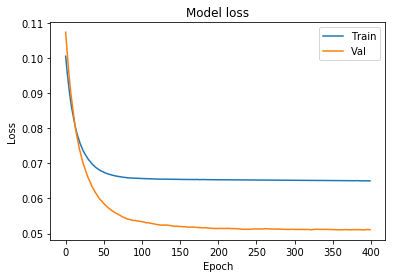

In [89]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [90]:
df_t3 = pd.read_excel(open('Cost_Sch-data.xlsx', 'rb'), sheet_name='Cost_T1')
df_t3.head()

,Unit Name,Region,"Local Content Requirment (H,M,A,L, N)","Company (NOC, IOC, OC)",Lease/ Own,Contract2,Contracting Date,"Contract (EPC, CL, PS, TK)",Planned_Duration,Planned_Cost,...,Oil/Gas_Prod,FEED_Detail,Schedule_Overrun,Cost_Overrun,18,11,7,Error(18),Error(11),Error(7)
0,Bohai Ming Zhu,8,5,2,2,1,4350,3,259,0.40,...,1.0000,1,0.471042,0.25,0.317105,0.352733,0.374591,-0.268421,-0.410934,-0.498362
1,Petrojarl Varg,5,1,1,1,1,2240,3,816,0.46,...,0.8658,2,0.286765,0.24,0.311924,0.211901,0.264636,-0.299684,0.117077,-0.102649
2,Stybarrow Venture MV16,4,3,3,1,3,5922,3,702,0.60,...,0.9143,4,-0.143875,0.27,0.306145,0.173708,0.141427,-0.133870,0.356636,0.476196
3,Alima FPU,1,2,3,2,1,5720,3,994,1.13,...,0.9000,4,-0.022133,0.35,0.306674,0.104643,0.097011,0.123788,0.701019,0.722826
4,Jangkrik,2,4,1,2,1,8824,3,1052,2.68,...,0.0554,3,0.114068,0.17,0.306662,0.175496,0.250755,-0.803895,-0.032327,-0.475027


In [91]:
dataset_t3 = df_t3.values
Xnew3 = dataset_t3[:,[1, 2, 4, 13, 14, 16, 18]]
Xnew3

array([[8, 5, 2, 2, 1, 1, 1],
       [5, 1, 1, 2, 1, 1, 2],
       [4, 3, 1, 3, 1, 2, 4],
       [1, 2, 2, 1, 2, 3, 4],
       [2, 4, 2, 2, 2, 2, 3],
       [4, 3, 2, 5, 6, 1, 5],
       [1, 3, 2, 2, 1, 4, 5],
       [1, 4, 2, 3, 1, 5, 2],
       [1, 4, 2, 3, 1, 1, 1],
       [1, 3, 2, 1, 1, 5, 2],
       [1, 4, 1, 1, 1, 3, 3],
       [1, 4, 1, 1, 1, 3, 3],
       [1, 3, 2, 3, 1, 2, 5],
       [1, 5, 2, 5, 1, 2, 1],
       [1, 1, 1, 1, 1, 3, 2],
       [1, 4, 1, 1, 1, 2, 5],
       [1, 2, 2, 2, 1, 2, 2],
       [1, 4, 2, 2, 1, 1, 3],
       [1, 4, 2, 3, 1, 1, 3],
       [1, 5, 2, 2, 1, 3, 2],
       [1, 4, 2, 2, 1, 2, 2],
       [1, 3, 2, 2, 1, 3, 2],
       [4, 4, 2, 5, 1, 2, 5],
       [4, 3, 2, 4, 1, 4, 5],
       [4, 3, 2, 2, 1, 2, 4],
       [7, 4, 2, 1, 1, 4, 1],
       [7, 5, 2, 1, 1, 4, 1],
       [7, 5, 2, 1, 1, 2, 1],
       [7, 3, 2, 2, 1, 1, 5],
       [7, 5, 1, 1, 1, 4, 1],
       [7, 5, 1, 1, 1, 5, 1],
       [7, 5, 2, 1, 1, 2, 2],
       [7, 5, 1, 5, 1, 1, 3],
       [7,

In [92]:
min_max_scaler = preprocessing.MinMaxScaler()
Xnew_scale2 = min_max_scaler.fit_transform(Xnew3)

In [93]:
ynew5 = model6.predict(Xnew_scale2)

In [94]:
print("The values of Xnew and its predicted yhat")
for loop in range(len(Xnew)):
        print("Xnew[%s] = %s, ynew[%s] = %s " % (loop,Xnew[loop],loop,ynew5[loop]))

The values of Xnew and its predicted yhat
Xnew[0] = [8 5 2 2 1 4350 3 259 0.4 1 40000 1 2 1 30 1 1.0 1], ynew[0] = [0.42989698] 
Xnew[1] = [5 1 1 1 1 2240 3 816 0.46 1 65833 2 2 1 84 1 0.8658 2], ynew[1] = [0.21450424] 
Xnew[2] = [4 3 3 1 3 5922 3 702 0.6 1 87500 2 3 1 825 2 0.9143 4], ynew[2] = [0.10208163] 
Xnew[3] = [1 2 3 2 1 5720 3 994 1.13 1 100000 3 1 2 600 3 0.9 4], ynew[3] = [0.06583223] 
Xnew[4] = [2 4 1 2 1 8824 3 1052 2.68 1 79400 2 2 2 120 2 0.0554 3], ynew[4] = [0.2969967] 
Xnew[5] = [4 3 3 2 1 7814 3 2229 11.16 1 148333 6 5 6 250 1 0.236 5], ynew[5] = [0.537268] 
Xnew[6] = [1 3 3 2 1 7534 3 1383 1.8 1 198333 4 2 1 1290 4 0.8067 5], ynew[6] = [0.04382408] 
Xnew[7] = [1 4 3 2 1 4872 3 1306 3.4 1 287000 6 3 1 1360 5 0.8362 2], ynew[7] = [0.0964582] 
Xnew[8] = [1 4 3 2 1 3103 3 823 2.5 1 246667 5 3 1 1350 1 0.8108 1], ynew[8] = [0.4289765] 
Xnew[9] = [1 3 3 2 1 4756 3 1071 0.76 1 316667 6 1 1 1250 5 0.7895 2], ynew[9] = [0.04096776] 
Xnew[10] = [1 4 3 1 1 5866 3 797 0.75 2 1

In [95]:
print(ynew5)

[[0.42989698]
 [0.21450424]
 [0.10208163]
 [0.06583223]
 [0.2969967 ]
 [0.537268  ]
 [0.04382408]
 [0.0964582 ]
 [0.4289765 ]
 [0.04096776]
 [0.06966385]
 [0.06966385]
 [0.19414794]
 [0.37043738]
 [0.04985115]
 [0.06643549]
 [0.17455715]
 [0.3601761 ]
 [0.39463967]
 [0.2272836 ]
 [0.2748319 ]
 [0.14936626]
 [0.33077058]
 [0.12756172]
 [0.24117929]
 [0.22474957]
 [0.27283895]
 [0.41258666]
 [0.449547  ]
 [0.10597739]
 [0.08874905]
 [0.36993802]
 [0.11305976]
 [0.23874569]
 [0.11149892]
 [0.4410347 ]
 [0.42758343]
 [0.32515758]
 [0.47160617]
 [0.40532506]
 [0.4668611 ]
 [0.11275727]
 [0.23722023]
 [0.46379572]
 [0.41989884]
 [0.2834733 ]
 [0.32245278]
 [0.11896574]
 [0.11454406]
 [0.11618936]
 [0.53007245]
 [0.52297723]
 [0.27674592]
 [0.48905352]
 [0.2330544 ]
 [0.4115027 ]
 [0.09947294]
 [0.5093629 ]
 [0.18723539]
 [0.4379277 ]
 [0.32789323]
 [0.27305362]
 [0.17958093]
 [0.2552599 ]
 [0.10918012]
 [0.5068233 ]
 [0.05007195]
 [0.55598783]
 [0.09528139]
 [0.08488512]
 [0.54701483]
 [0.56

In [96]:
print(type(ynew5))
print(ynew5.shape)
#print(range(ynew5))

#Cost_Pred3 = pd.DataFrame
Cost_Pred3 = pd.DataFrame(ynew3)
Cost_Pred3['13'] = pd.DataFrame(ynew4)
Cost_Pred3['7'] = pd.DataFrame(ynew5)
Cost_Pred3['Name'] = df['Unit Name']
print(Cost_Pred3)

<class 'numpy.ndarray'>
(103, 1)
            0        13         7                    Name
0    0.281069  0.291567  0.429897          Bohai Ming Zhu
1    0.279118  0.260311  0.214504          Petrojarl Varg
2    0.278071  0.255192  0.102082  Stybarrow Venture MV16
3    0.280350  0.237222  0.065832               Alima FPU
4    0.288063  0.250673  0.296997                Jangkrik
..        ...       ...       ...                     ...
98   0.276258  0.242896  0.076501                Ursa TLP
99   0.275486  0.236351  0.076501          Ram Powell TLP
100  0.283200  0.293590  0.506461                Big Foot
101  0.278128  0.262280  0.242413             Heidrun TLP
102  0.283448  0.251220  0.193780             Malikai TLP

[103 rows x 4 columns]


In [97]:
Cost_Pred3.to_excel("Cost_Pred3.xlsx")